# -----------------------------------   DATA MINING Project  ---------------------------- 

## Realized by : OUSSAKEL Khadija    ___________________________ Supervised by : EL ASRI Ikram

# Getting started

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import missingno as msno 
import datetime as dt

In [2]:
# Read in the dataset
wandaloo_cars = pd.read_csv('wandaloo_cars.csv')

In [3]:
wandaloo_cars

,Brand,Model,Version,Price,Modèle,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,...,Airbags,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
0,MERCEDES,Classe C 2014,220 d,228.000 DH,2014.0,Seconde,144.500 km,Diesel,Automatique,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
1,MERCEDES,Classe C 2003,220 CDI,79.000 DH,2003.0,Seconde,350.000 km,Diesel,Manuelle,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
2,MERCEDES,Classe B 2013,180 d Urban,150.000 DH,2013.0,Seconde,144.000 km,Diesel,Manuelle,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
3,MERCEDES,Classe E 2006,Autre version,135.000 DH,2006.0,Seconde,248.000 km,Diesel,Automatique,9 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
4,MERCEDES,CLA Coupé 2014,220 CDI,240.000 DH,2014.0,Seconde,103.000 km,Diesel,Automatique,9 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,VOLVO,XC90,NaN,630.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,8 cv,...,7.0,oui,oui,oui,4 cylindres,1.969 cm³,"6,3 l/100 km","5,4 l/100 km",220 km/h,71 litre
3125,VOLVO,XC90,NaN,730.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,8 cv,...,7.0,oui,oui,oui,4 cylindres,1.969 cm³,"6,3 l/100 km","5,4 l/100 km",220 km/h,71 litre
3126,VOLVO,XC90,NaN,850.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,8 cv,...,7.0,oui,oui,oui,4 cylindres,1.969 cm³,"6,3 l/100 km","5,4 l/100 km",220 km/h,71 litre
3127,VOLVO,XC90,NaN,1.000.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,11 cv,...,7.0,oui,oui,oui,4 cylindres,1.969 cm³,- l/100 km,- l/100 km,230 km/h,71 litre


# Part 1 : Diagnosing data cleaning problems

#### Some important and common methods needed to get a better understanding of DataFrames and diagnose potential data problems are the following:
- head() prints the header of a DataFrame
- dtypes prints datatypes of all columns in a DataFrame
- info() provides a bird's eye view of column data types and missing values in a DataFrame
- describe() returns a distribution of numeric columns in your DataFrame
- isna().sum() allows us to break down the number of missing values per column in our DataFrame
- unique() finds the number of unique values in a DataFrame column
- sns.displot() plots the distribution of one column in your DataFrame.

In [4]:
wandaloo_cars.head()

,Brand,Model,Version,Price,Modèle,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,...,Airbags,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
0,MERCEDES,Classe C 2014,220 d,228.000 DH,2014.0,Seconde,144.500 km,Diesel,Automatique,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
1,MERCEDES,Classe C 2003,220 CDI,79.000 DH,2003.0,Seconde,350.000 km,Diesel,Manuelle,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
2,MERCEDES,Classe B 2013,180 d Urban,150.000 DH,2013.0,Seconde,144.000 km,Diesel,Manuelle,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
3,MERCEDES,Classe E 2006,Autre version,135.000 DH,2006.0,Seconde,248.000 km,Diesel,Automatique,9 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
4,MERCEDES,CLA Coupé 2014,220 CDI,240.000 DH,2014.0,Seconde,103.000 km,Diesel,Automatique,9 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
wandaloo_cars.dtypes

Brand                                    object
Model                                    object
Version                                  object
Price                                    object
Modèle                                  float64
Main                                     object
Kilométrage                              object
Carburant                                object
Transmision                              object
Puissance fiscale                        object
Couleur extérieure                       object
Etat du véhicule                         object
Climatisation                            object
Vitres électriques                       object
Sièges électriques                       object
Ordinateur de bord                       object
Start & Stop                             object
Régulateur de vitesse                    object
Allumage auto. des feux                  object
Détecteur de pluie                       object
Commandes au volant                     

## Data type problems:
- Problem 1: Price need to be converted to float.
- Problem 2: Modèle must be in datetime
- Problem 3: Kilométrage need to be converted to float then to int.
- Problem 4: Puissance fiscale need to be converted to float then to int.
- Problem 5: Cylindrée need to be converted to float.  
- Problem 6: Conso. ville and Conso. route need to be converted to float.  
- Problem 7: Vitesse maxi. need to be converted to float. 
- Problem 8: Volume du réservoir. need to be converted to float.  
    
## Missing data problems:
- Problem 9: We can see that there are missing data in some columns.

In [6]:
wandaloo_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Brand                                 3063 non-null   object 
 1   Model                                 3063 non-null   object 
 2   Version                               2180 non-null   object 
 3   Price                                 3063 non-null   object 
 4   Modèle                                2180 non-null   float64
 5   Main                                  2180 non-null   object 
 6   Kilométrage                           2180 non-null   object 
 7   Carburant                             2166 non-null   object 
 8   Transmision                           2180 non-null   object 
 9   Puissance fiscale                     3048 non-null   object 
 10  Couleur extérieure                    2180 non-null   object 
 11  Etat du véhicule 

In [7]:
wandaloo_cars.isna().sum()

Brand                                     66
Model                                     66
Version                                  949
Price                                     66
Modèle                                   949
Main                                     949
Kilométrage                              949
Carburant                                963
Transmision                              949
Puissance fiscale                         81
Couleur extérieure                       949
Etat du véhicule                         949
Climatisation                             81
Vitres électriques                        81
Sièges électriques                       101
Ordinateur de bord                        81
Start & Stop                              81
Régulateur de vitesse                     81
Allumage auto. des feux                   81
Détecteur de pluie                        81
Commandes au volant                       81
Ecran tactile                             81
Rétroviseu

In [8]:
wandaloo_cars[wandaloo_cars.isna()]

,Brand,Model,Version,Price,Modèle,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,...,Airbags,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Delete line if brand is nan
wandaloo_cars= wandaloo_cars.dropna(subset=['Brand'])
wandaloo_cars.isna().sum()

Brand                                      0
Model                                      0
Version                                  883
Price                                      0
Modèle                                   883
Main                                     883
Kilométrage                              883
Carburant                                897
Transmision                              883
Puissance fiscale                         15
Couleur extérieure                       883
Etat du véhicule                         883
Climatisation                             15
Vitres électriques                        15
Sièges électriques                        35
Ordinateur de bord                        15
Start & Stop                              15
Régulateur de vitesse                     15
Allumage auto. des feux                   15
Détecteur de pluie                        15
Commandes au volant                       15
Ecran tactile                             15
Rétroviseu

# Part 2 : Cleaning data

## Task1 : Converting the type of 'Price' column to float

In [10]:
wandaloo_cars['Price'].head()

0    228.000 DH
1     79.000 DH
2    150.000 DH
3    135.000 DH
4    240.000 DH
Name: Price, dtype: object

In [11]:
wandaloo_cars['Price']=wandaloo_cars['Price'].str.replace('[^\d]','',regex=True)
wandaloo_cars['Price']=wandaloo_cars['Price'].astype('float')
wandaloo_cars=wandaloo_cars.rename(columns={'Price': 'Prix - DH'})
wandaloo_cars['Prix - DH'].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_13500\908512053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wandaloo_cars['Price']=wandaloo_cars['Price'].str.replace('[^\d]','',regex=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13500\908512053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wandaloo_cars['Price']=wandaloo_cars['Price'].astype('float')


269213.4142997062

## Task2 : Converting the type of 'Modèle' column to Datetime

In [12]:
wandaloo_cars['Modèle'].head()

0    2014.0
1    2003.0
2    2013.0
3    2006.0
4    2014.0
Name: Modèle, dtype: float64

In [13]:
wandaloo_cars['Modèle']=wandaloo_cars['Modèle'].apply(lambda x: str(x).split(".")[0])
wandaloo_cars['Modèle'] = pd.to_datetime(wandaloo_cars['Modèle'], format="%Y-%m-%d")
wandaloo_cars['Modèle'].head()

0   2014-01-01
1   2003-01-01
2   2013-01-01
3   2006-01-01
4   2014-01-01
Name: Modèle, dtype: datetime64[ns]

## Task3 : Converting the type of 'Kilométrage' column to float

In [14]:
wandaloo_cars['Kilométrage'].head()

0    144.500 km
1    350.000 km
2    144.000 km
3    248.000 km
4    103.000 km
Name: Kilométrage, dtype: object

In [15]:
wandaloo_cars['Kilométrage']=wandaloo_cars['Kilométrage'].str.replace('[^\d]','',regex=True)
wandaloo_cars['Kilométrage']=wandaloo_cars['Kilométrage'].astype('float')
wandaloo_cars['Kilométrage'].head()

0    144500.0
1    350000.0
2    144000.0
3    248000.0
4    103000.0
Name: Kilométrage, dtype: float64

## Task4 : Converting the type of 'Puissance fiscale' column to float

In [16]:
wandaloo_cars['Puissance fiscale'].unique()

array(['8 cv', '9 cv', '6 cv', '12 cv', '11 cv', '10 cv', '7 cv', '13 cv',
       '-', '17 cv', '4 cv', '5 cv', '06 cv', '14 cv', '2 cv', '85 cv',
       '1 cv', '07 cv', '95 cv', '75 cv', '73 cv', '- cv', '16 cv',
       '21 cv', '47 cv', '15 cv', '23 cv', '22 cv', '26 cv', '29 cv',
       '70 cv', '81 cv', '3 cv', '19 cv', '18 cv', '08 cv', '24 cv',
       '25 cv', nan, 'cv', '20 cv', '37 cv', '27 cv'], dtype=object)

In [17]:
wandaloo_cars['Puissance fiscale']=wandaloo_cars['Puissance fiscale'].str.strip(" cv")
wandaloo_cars['Puissance fiscale']=wandaloo_cars['Puissance fiscale'].replace(["-",''],np.nan)
wandaloo_cars['Puissance fiscale']=wandaloo_cars['Puissance fiscale'].astype('float')
wandaloo_cars=wandaloo_cars.rename(columns={'Puissance fiscale': 'Puissance fiscale en cv'})
wandaloo_cars['Puissance fiscale en cv'].head()

0    8.0
1    8.0
2    8.0
3    9.0
4    9.0
Name: Puissance fiscale en cv, dtype: float64

## Task5 : Replacing values and collapsing data of 'Climatisation' column

In [18]:
wandaloo_cars['Climatisation'].unique()

array(['auto. Bi-zone', 'auto.', 'manuelle', 'auto. Multi-zone',
       'auto. Tri-zone', 'non', 'تلقاءي.', 'auto. Quadri-zone', nan],
      dtype=object)

In [19]:
wandaloo_cars['Climatisation']=wandaloo_cars['Climatisation'].replace('تلقاءي.','auto.')

## Task6 : Replacing values and collapsing data of 'Jantes aluminium' column

In [20]:
wandaloo_cars['Jantes aluminium'].unique()

array(['oui', 'non', '17 pouces', '18 pouces', '19 pouces', '20 pouces',
       '16 pouces', '21 pouces', '22 pouces', '15 pouces', nan,
       '14 pouces'], dtype=object)

In [21]:
wandaloo_cars['Jantes aluminium'].value_counts()

oui          1429
non           837
18 pouces     198
17 pouces     187
19 pouces     155
16 pouces     107
20 pouces      76
21 pouces      24
15 pouces      22
14 pouces       8
22 pouces       5
Name: Jantes aluminium, dtype: int64

In [22]:
wandaloo_cars['Jantes aluminium'] =wandaloo_cars['Jantes aluminium'].map({'18 pouces':'oui','17 pouces':'oui','19 pouces':'oui','16 pouces':'oui','20 pouces':'oui','21 pouces':'oui','15 pouces':'oui','14 pouces':'oui','22 pouces':'oui','oui':'oui','non':'non'})

In [23]:
wandaloo_cars['Jantes aluminium'].value_counts()

oui    2211
non     837
Name: Jantes aluminium, dtype: int64

## Task7 : Replacing values and collapsing data of 'Airbags' column

In [24]:
wandaloo_cars['Airbags'].unique()

array(['oui', 'non', '8.0', '6.0', '10.0', '7.0', '0.0', '2.0', '4.0',
       nan, '9.0', '1.0'], dtype=object)

In [25]:
wandaloo_cars['Airbags'].value_counts()

oui     1922
6.0      290
non      258
8.0      183
7.0      171
2.0      117
4.0       51
9.0       24
10.0      23
0.0        7
1.0        2
Name: Airbags, dtype: int64

In [26]:
wandaloo_cars['Airbags'] =wandaloo_cars['Airbags'].map({'6.0':'oui','8.0':'oui','7.0':'oui','2.0':'oui','4.0':'oui','9.0':'oui','10.0':'oui','1.0':'oui','0.0':'non','oui':'oui','non':'non'})

In [27]:
wandaloo_cars['Airbags'].value_counts()

oui    2783
non     265
Name: Airbags, dtype: int64

## Task8 : Converting the type of 'Cylindrée' column to float

In [28]:
wandaloo_cars['Cylindrée'].unique()

array([nan, '2.143 cm³', '2.891 cm³', '1.968 cm³', '2.967 cm³',
       '1.598 cm³', '1.496 cm³', '1.995 cm³', '1.998 cm³', '2.998 cm³',
       '2.993 cm³', '4.395 cm³', '1.560 cm³', '1.499 cm³', '1.997 cm³',
       '1.597 cm³', '999 cm³', '1.461 cm³', '1.198 cm³', '1.498 cm³',
       '1.242 cm³', '1.368 cm³', '1.248 cm³', '1.100 cm³', '2.956 cm³',
       '2.300 cm³', '4.951 cm³', '1.318 cm³', '1.996 cm³', '1.993 cm³',
       '1.493 cm³', '1.580 cm³', '1.999 cm³', '2.199 cm³', '2.987 cm³',
       '998 cm³', '1.197 cm³', '3.342 cm³', '2.151 cm³', '2.996 cm³',
       '2.997 cm³', '2.494 cm³', '2.487 cm³', '3.456 cm³', '1.987 cm³',
       '2.179 cm³', '2.191 cm³', '1.950 cm³', '1.332 cm³', '1.991 cm³',
       '2.925 cm³', '3.982 cm³', '5.980 cm³', '2.268 cm³', '2.477 cm³',
       '1.199 cm³', '1.910 cm³', '2.981 cm³', '3.745 cm³', '2.894 cm³',
       '1.984 cm³', '2.995 cm³', '1.333 cm³', '1.490 cm³', '1.798 cm³',
       '2.393 cm³', '2.982 cm³', '4.461 cm³', '1.969 cm³', '1.477 cm³'],
   

In [29]:
wandaloo_cars['Cylindrée']=wandaloo_cars['Cylindrée'].str.strip(" cm³")
wandaloo_cars['Cylindrée']=wandaloo_cars['Cylindrée'].astype("float")
wandaloo_cars=wandaloo_cars.rename(columns={'Cylindrée': 'Cylindrée en cm³'})
wandaloo_cars['Cylindrée en cm³'].unique()

array([    nan,   2.143,   2.891,   1.968,   2.967,   1.598,   1.496,
         1.995,   1.998,   2.998,   2.993,   4.395,   1.56 ,   1.499,
         1.997,   1.597, 999.   ,   1.461,   1.198,   1.498,   1.242,
         1.368,   1.248,   1.1  ,   2.956,   2.3  ,   4.951,   1.318,
         1.996,   1.993,   1.493,   1.58 ,   1.999,   2.199,   2.987,
       998.   ,   1.197,   3.342,   2.151,   2.996,   2.997,   2.494,
         2.487,   3.456,   1.987,   2.179,   2.191,   1.95 ,   1.332,
         1.991,   2.925,   3.982,   5.98 ,   2.268,   2.477,   1.199,
         1.91 ,   2.981,   3.745,   2.894,   1.984,   2.995,   1.333,
         1.49 ,   1.798,   2.393,   2.982,   4.461,   1.969,   1.477])

## Task9 : Converting the type of 'Conso. ville' column to float

In [30]:
wandaloo_cars['Conso. ville'].unique()

array([nan, '6,2 l/100 km', '12,8 l/100 km', '6,1 l/100 km',
       '6,9 l/100 km', '5,0 l/100 km', '4,6 l/100 km', '4,2 l/100 km',
       '4,9 l/100 km', '4,8 l/100 km', '4,7 l/100 km', '5,1 l/100 km',
       '6,3 l/100 km', '8,1 l/100 km', '5,5 l/100 km', '7,3 l/100 km',
       '9,6 l/100 km', '5,2 l/100 km', '8,4 l/100 km', '4,3 l/100 km',
       '8,5 l/100 km', '5,3 l/100 km', '- l/100 km', '9,2 l/100 km',
       '5,9 l/100 km', '7,6 l/100 km', '7,8 l/100 km', '8,6 l/100 km',
       '11,4 l/100 km', '5,8 l/100 km', '7,5 l/100 km', '13,8 l/100 km',
       '15,1 l/100 km', '15,2 l/100 km', '8,3 l/100 km', '14,2 l/100 km',
       '5,6 l/100 km', '5,4 l/100 km', '7,2 l/100 km', '6,8 l/100 km',
       '7,9 l/100 km', '5,7 l/100 km', '4,4 l/100 km', '4,5 l/100 km',
       '3,9 l/100 km', '6,4 l/100 km', '7,7 l/100 km', '9,0 l/100 km',
       '14,1 l/100 km', '18,6 l/100 km', '6,0 l/100 km', '6,5 l/100 km',
       'l/100 km', '8,8 l/100 km', '9,3 l/100 km', '11,2 l/100 km',
       '12,9 l

In [31]:
wandaloo_cars['Conso. ville']=wandaloo_cars['Conso. ville'].replace(["- l/100 km",'l/100 km'],np.nan)
wandaloo_cars['Conso. ville']=wandaloo_cars['Conso. ville'].str.replace(",",".")
wandaloo_cars['Conso. ville']=wandaloo_cars['Conso. ville'].str.replace("l/100 km","")
wandaloo_cars['Conso. ville']=wandaloo_cars['Conso. ville'].astype("float")
wandaloo_cars=wandaloo_cars.rename(columns={'Conso. ville': 'Conso. ville en l/100km'})
wandaloo_cars['Conso. ville en l/100km'].unique()

array([ nan,  6.2, 12.8,  6.1,  6.9,  5. ,  4.6,  4.2,  4.9,  4.8,  4.7,
        5.1,  6.3,  8.1,  5.5,  7.3,  9.6,  5.2,  8.4,  4.3,  8.5,  5.3,
        9.2,  5.9,  7.6,  7.8,  8.6, 11.4,  5.8,  7.5, 13.8, 15.1, 15.2,
        8.3, 14.2,  5.6,  5.4,  7.2,  6.8,  7.9,  5.7,  4.4,  4.5,  3.9,
        6.4,  7.7,  9. , 14.1, 18.6,  6. ,  6.5,  8.8,  9.3, 11.2, 12.9,
        7.1,  3.4,  6.6,  8.9,  8.7,  7. , 11.1, 13.4, 18.7,  3.5,  3.7,
        4.1,  3.8,  4. , 18.5, 17.8, 18.2, 18.1, 18.3, 20.2, 20.7, 15.3,
        7.4,  8.2,  9.5,  9.8,  3.2,  3.6, 13.5])

## Task10 : Converting the type of 'Conso. route' column to float

In [32]:
wandaloo_cars['Conso. route'].unique()

array([nan, '4,3 l/100 km', '6,1 l/100 km', '5,2 l/100 km',
       '5,6 l/100 km', '3,2 l/100 km', '3,4 l/100 km', '3,8 l/100 km',
       '3,9 l/100 km', '5,0 l/100 km', '4,4 l/100 km', '5,4 l/100 km',
       '5,7 l/100 km', '3,6 l/100 km', '4,8 l/100 km', '4,0 l/100 km',
       '4,6 l/100 km', '7,5 l/100 km', '4,2 l/100 km', '3,7 l/100 km',
       '6,6 l/100 km', '4,1 l/100 km', '4,5 l/100 km', '- l/100 km',
       '5,8 l/100 km', '6,2 l/100 km', '8,3 l/100 km', '5,1 l/100 km',
       '5,3 l/100 km', '7,7 l/100 km', '7,9 l/100 km', '8,0 l/100 km',
       '8,1 l/100 km', '6,3 l/100 km', '4,9 l/100 km', '4,7 l/100 km',
       '6,5 l/100 km', '6,7 l/100 km', '3,5 l/100 km', '3,3 l/100 km',
       '10,0 l/100 km', '12,0 l/100 km', 'l/100 km', '7,8 l/100 km',
       '5,5 l/100 km', '7,1 l/100 km', '6,9 l/100 km', '6,4 l/100 km',
       '9,1 l/100 km', '9,8 l/100 km', '10,3 l/100 km', '10,7 l/100 km',
       '3,1 l/100 km', '2,9 l/100 km', '3,0 l/100 km', '8,8 l/100 km',
       '9,2 l/100 k

In [33]:
wandaloo_cars['Conso. route']=wandaloo_cars['Conso. route'].replace(["- l/100 km",'l/100 km'],np.nan)
wandaloo_cars['Conso. route']=wandaloo_cars['Conso. route'].str.replace(",",".")
wandaloo_cars['Conso. route']=wandaloo_cars['Conso. route'].str.replace("l/100 km","")
wandaloo_cars['Conso. route']=wandaloo_cars['Conso. route'].astype("float")
wandaloo_cars=wandaloo_cars.rename(columns={'Conso. route': 'Conso. route en l/100km'})
wandaloo_cars['Conso. route en l/100km'].unique()

array([ nan,  4.3,  6.1,  5.2,  5.6,  3.2,  3.4,  3.8,  3.9,  5. ,  4.4,
        5.4,  5.7,  3.6,  4.8,  4. ,  4.6,  7.5,  4.2,  3.7,  6.6,  4.1,
        4.5,  5.8,  6.2,  8.3,  5.1,  5.3,  7.7,  7.9,  8. ,  8.1,  6.3,
        4.9,  4.7,  6.5,  6.7,  3.5,  3.3, 10. , 12. ,  7.8,  5.5,  7.1,
        6.9,  6.4,  9.1,  9.8, 10.3, 10.7,  3.1,  2.9,  3. ,  8.8,  9.2,
        9. , 10.2,  9.5,  5.9,  9.3,  8.5])

## Task11 : Converting the type of 'Vitesse maxi.' column to float

In [34]:
wandaloo_cars['Vitesse maxi.'].unique() 

array([nan, '230 km/h', '307 km/h', '210 km/h', '215 km/h', '206 km/h',
       '222 km/h', '232 km/h', '250 km/h', '245 km/h', '201 km/h',
       '216 km/h', '207 km/h', '195 km/h', '225 km/h', '200 km/h',
       '194 km/h', '224 km/h', '236 km/h', '240 km/h', '235 km/h',
       '238 km/h', '190 km/h', '205 km/h', '213 km/h', '220 km/h',
       '45 km/h', '180 km/h', '172 km/h', '193 km/h', '175 km/h',
       '189 km/h', '211 km/h', '150 km/h', '165 km/h', '158 km/h',
       '174 km/h', '155 km/h', '169 km/h', '168 km/h', '160 km/h',
       '185 km/h', '199 km/h', '186 km/h', '170 km/h', '187 km/h',
       '218 km/h', '177 km/h', '208 km/h', '233 km/h', '182 km/h',
       '156 km/h', '173 km/h', '161 km/h', '192 km/h', 'km/h', '217 km/h',
       '249 km/h', '178 km/h', '202 km/h', '270 km/h', '167 km/h',
       '162 km/h', '183 km/h', '209 km/h', '234 km/h', '- km/h',
       '204 km/h', '219 km/h', '244 km/h', '239 km/h', '242 km/h',
       '231 km/h', '227 km/h', '241 km/h', '179 km/h

In [35]:
wandaloo_cars['Vitesse maxi.']=wandaloo_cars['Vitesse maxi.'].str.strip(" km/h")
wandaloo_cars['Vitesse maxi.']=wandaloo_cars['Vitesse maxi.'].replace(["-",''],np.nan)
wandaloo_cars['Vitesse maxi.']=wandaloo_cars['Vitesse maxi.'].astype("float")
wandaloo_cars=wandaloo_cars.rename(columns={'Vitesse maxi.': 'Vitesse maxi. en km/h'})
wandaloo_cars['Vitesse maxi. en km/h'].unique()

array([ nan, 230., 307., 210., 215., 206., 222., 232., 250., 245., 201.,
       216., 207., 195., 225., 200., 194., 224., 236., 240., 235., 238.,
       190., 205., 213., 220.,  45., 180., 172., 193., 175., 189., 211.,
       150., 165., 158., 174., 155., 169., 168., 160., 185., 199., 186.,
       170., 187., 218., 177., 208., 233., 182., 156., 173., 161., 192.,
       217., 249., 178., 202., 270., 167., 162., 183., 209., 234., 204.,
       219., 244., 239., 242., 231., 227., 241., 179., 196., 188., 292.,
       308., 306., 304., 320., 330., 280., 298., 315., 259., 272., 253.,
       260., 197., 181., 164., 191., 228., 184., 171., 198.])

## Task12 : Converting the type of 'Volume du réservoir' column to float

In [36]:
wandaloo_cars['Volume du réservoir'].unique()

array([nan, '58 litre', '50 litre', '40 litre', '73 litre', '82 litre',
       '60 litre', '65 litre', '85 litre', '57 litre', '59 litre',
       '68 litre', '78 litre', '66 litre', '51 litre', '67 litre',
       '80 litre', '42 litre', '45 litre', '- litre', '41 litre',
       '55 litre', '35 litre', '48 litre', '47 litre', '62 litre',
       '54 litre', '36 litre', '38 litre', '56 litre', '74 litre',
       '70 litre', '94 litre', '43 litre', '72 litre', '104 litre',
       '89 litre', '86 litre', '44 litre', '76 litre', '100 litre',
       '63 litre', '46 litre', '53 litre', '61 litre', '75 litre',
       '90 litre', '52 litre', '37 litre', '87 litre', '93 litre',
       '71 litre'], dtype=object)

In [37]:
wandaloo_cars['Volume du réservoir']=wandaloo_cars['Volume du réservoir'].str.strip(" litre")
wandaloo_cars['Volume du réservoir']=wandaloo_cars['Volume du réservoir'].replace("-",np.nan)
wandaloo_cars['Volume du réservoir']=wandaloo_cars['Volume du réservoir'].astype("float")
wandaloo_cars=wandaloo_cars.rename(columns={'Volume du réservoir': 'Volume du réservoir en Litre'})
wandaloo_cars['Volume du réservoir en Litre'].unique()

array([ nan,  58.,  50.,  40.,  73.,  82.,  60.,  65.,  85.,  57.,  59.,
        68.,  78.,  66.,  51.,  67.,  80.,  42.,  45.,  41.,  55.,  35.,
        48.,  47.,  62.,  54.,  36.,  38.,  56.,  74.,  70.,  94.,  43.,
        72., 104.,  89.,  86.,  44.,  76., 100.,  63.,  46.,  53.,  61.,
        75.,  90.,  52.,  37.,  87.,  93.,  71.])

# Part 3 : Dealing with missing data

In [38]:
wandaloo_cars.isna().sum()

Brand                                      0
Model                                      0
Version                                  883
Prix - DH                                  0
Modèle                                   883
Main                                     883
Kilométrage                              883
Carburant                                897
Transmision                              883
Puissance fiscale en cv                  320
Couleur extérieure                       883
Etat du véhicule                         883
Climatisation                             15
Vitres électriques                        15
Sièges électriques                        35
Ordinateur de bord                        15
Start & Stop                              15
Régulateur de vitesse                     15
Allumage auto. des feux                   15
Détecteur de pluie                        15
Commandes au volant                       15
Ecran tactile                             15
Rétroviseu

## Task1 : Deleting columns with a lot of missing values

In [39]:
# Drop the specified columns
wandaloo_cars = wandaloo_cars.drop(columns=["Architecture","Cylindrée en cm³","Conso. ville en l/100km","Conso. route en l/100km","Vitesse maxi. en km/h","Volume du réservoir en Litre"])

In [40]:
wandaloo_cars.isna().sum()

Brand                                     0
Model                                     0
Version                                 883
Prix - DH                                 0
Modèle                                  883
Main                                    883
Kilométrage                             883
Carburant                               897
Transmision                             883
Puissance fiscale en cv                 320
Couleur extérieure                      883
Etat du véhicule                        883
Climatisation                            15
Vitres électriques                       15
Sièges électriques                       35
Ordinateur de bord                       15
Start & Stop                             15
Régulateur de vitesse                    15
Allumage auto. des feux                  15
Détecteur de pluie                       15
Commandes au volant                      15
Ecran tactile                            15
Rétroviseurs électriques        

## Task2 : Dealing with missing data of 'Version' column

In [41]:
wandaloo_cars['Version'].value_counts()

Autre version                  374
1.7 CDTi Cosmo                  32
1.5 dCi Authentique             27
220 CDI                         24
1.6 HDi Active                  16
                              ... 
1.6 dCi L2H1                     1
1.5 dCi Exception                1
1.5 dCi Privilege                1
1.5 dCi Storm                    1
2.0 D4 190 Momentum Confort      1
Name: Version, Length: 733, dtype: int64

In [42]:
wandaloo_cars['Version']=wandaloo_cars['Version'].fillna('Autre version')

## Task3 : Dealing with missing data of 'Main' ,'Modèle' and 'Kilométrage' column

In [43]:
wandaloo_cars['Main'].value_counts()

Seconde     1126
Première    1054
Name: Main, dtype: int64


- "Première Main" means that the car was purchased new by its first owner and has therefore had only one previous owner.

- "Seconde Main" means that the car has had two previous owners, with the current owner being the third owner.

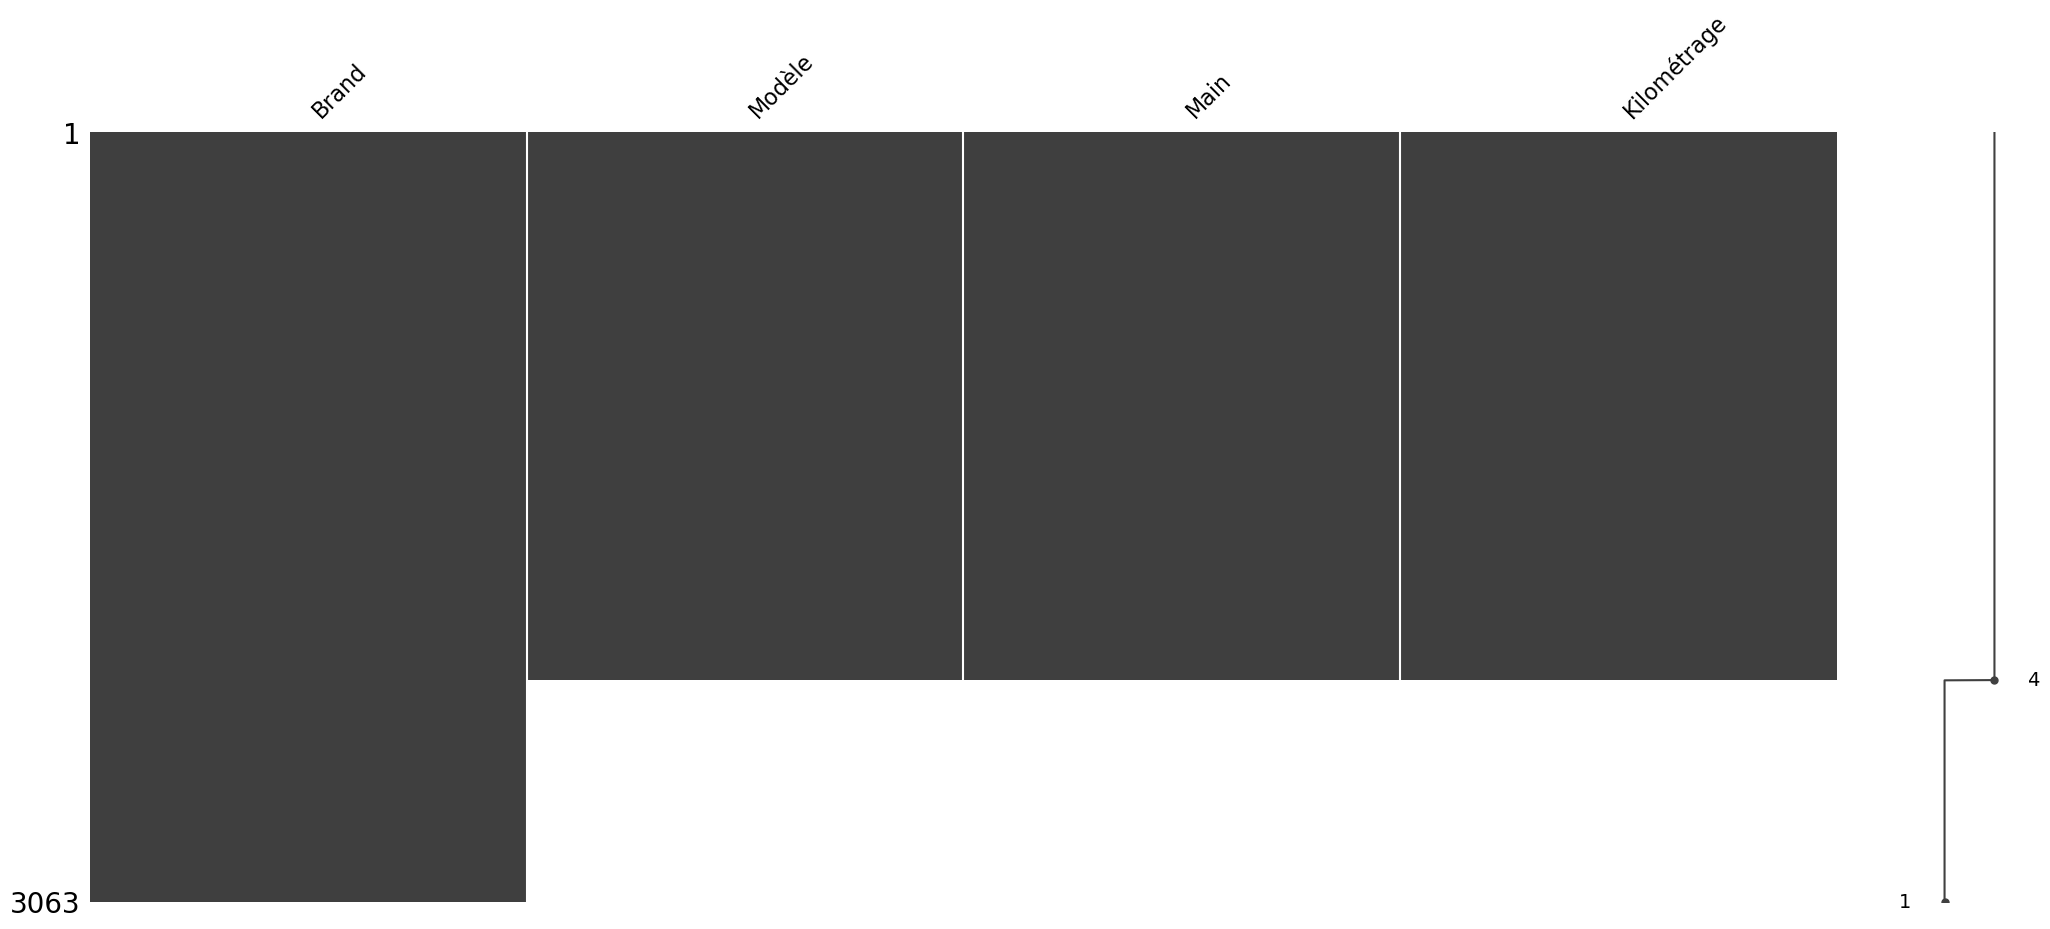

In [44]:
msno.matrix(wandaloo_cars[['Brand','Modèle','Main','Kilométrage']].sort_values(by = 'Kilométrage'))
plt.show()

### -> Rows that have no Kilométrage value do not have any values in the Main column or Modèle column. This indicates that these rows represent new items.

In [45]:
# Add a new value
wandaloo_cars['Main']=wandaloo_cars['Main'].fillna('Nouvelle')
wandaloo_cars['Kilométrage']=wandaloo_cars['Kilométrage'].fillna("0")
wandaloo_cars['Kilométrage']=wandaloo_cars['Kilométrage'].astype("int")
wandaloo_cars['Modèle']=wandaloo_cars['Modèle'].fillna("2023-01-01")

## Task4 : Dealing with missing data of 'Carburant' column

In [46]:
wandaloo_cars['Carburant'].value_counts()

Diesel        1902
Essence        256
Hybride          7
Electrique       1
Name: Carburant, dtype: int64

In [47]:
#Fill in with the most frequent value
wandaloo_cars['Carburant']=wandaloo_cars['Carburant'].fillna('Diesel')

## Task5 : Dealing with missing data of 'Transmision' column

In [48]:
wandaloo_cars['Transmision'].value_counts()

Manuelle       1146
Automatique    1034
Name: Transmision, dtype: int64

In [49]:
wandaloo_cars.groupby('Brand')['Transmision'].value_counts()

Brand       Transmision
MERCEDES    Automatique    150
            Manuelle        29
MINI        Automatique     14
            Manuelle         6
MITSUBISHI  Manuelle        11
            Automatique      9
NISSAN      Manuelle        97
            Automatique     31
OPEL        Manuelle       100
            Automatique     56
PEUGEOT     Manuelle       204
            Automatique    125
PORSCHE     Automatique     20
            Manuelle         1
RENAULT     Manuelle       251
            Automatique    144
SEAT        Manuelle        87
            Automatique     35
SKODA       Manuelle        41
            Automatique     19
SSANGYONG   Automatique     18
            Manuelle         8
SUZUKI      Manuelle         7
            Automatique      5
TOYOTA      Manuelle        77
            Automatique     71
VOLKSWAGEN  Automatique    296
            Manuelle       209
VOLVO       Automatique     41
            Manuelle        18
Name: Transmision, dtype: int64

In [50]:
transmision = wandaloo_cars['Transmision'].unique()
brand = wandaloo_cars['Brand'].unique()
d = {}

for i in brand:
    m = 0
    for j in transmision:
        count = wandaloo_cars[(wandaloo_cars.Transmision == j) & (wandaloo_cars.Brand == i)].shape[0]
        if count > m:
            m = count
            d[i] = j
    if i in d:
        wandaloo_cars.loc[(wandaloo_cars.Brand == i) & (wandaloo_cars.Transmision.isnull()), "Transmision"] = d[i];


In [51]:
wandaloo_cars.groupby('Brand')['Transmision'].value_counts()

Brand       Transmision
MERCEDES    Automatique    267
            Manuelle        29
MINI        Automatique     31
            Manuelle         6
MITSUBISHI  Manuelle        17
            Automatique      9
NISSAN      Manuelle       114
            Automatique     31
OPEL        Manuelle       116
            Automatique     56
PEUGEOT     Manuelle       235
            Automatique    125
PORSCHE     Automatique     56
            Manuelle         1
RENAULT     Manuelle       279
            Automatique    144
SEAT        Manuelle       105
            Automatique     35
SKODA       Manuelle        68
            Automatique     19
SSANGYONG   Automatique     29
            Manuelle         8
SUZUKI      Manuelle        18
            Automatique      5
TOYOTA      Manuelle       105
            Automatique     71
VOLKSWAGEN  Automatique    323
            Manuelle       209
VOLVO       Automatique     64
            Manuelle        18
Name: Transmision, dtype: int64

In [52]:
wandaloo_cars['Transmision'].isnull().sum()

470

In [53]:
wandaloo_cars['Transmision'].value_counts()

Manuelle       1328
Automatique    1265
Name: Transmision, dtype: int64

In [54]:
wandaloo_cars['Transmision']=wandaloo_cars['Transmision'].fillna("Manuelle")

In [55]:
wandaloo_cars['Transmision'].isnull().sum()

0

In [56]:
#Replace "Automatique" with 1 and "Manuelle" with 0
wandaloo_cars['Transmision']=wandaloo_cars['Transmision'].map({'Automatique':1,'Manuelle':0})

## Task6 : Dealing with missing data of 'Puissance fiscale en cv' column

In [57]:
wandaloo_cars.groupby('Brand')['Puissance fiscale en cv'].value_counts()

Brand  Puissance fiscale en cv
ALFA   9.0                         3
       8.0                         2
       17.0                        1
AUDI   8.0                        46
       12.0                       14
                                  ..
VOLVO  10.0                        4
       5.0                         1
       7.0                         1
       9.0                         1
       18.0                        1
Name: Puissance fiscale en cv, Length: 189, dtype: int64

In [58]:
puissance_fiscale = wandaloo_cars['Puissance fiscale en cv'].unique()
brand = wandaloo_cars['Brand'].unique()
d = {}

for i in brand:
    m = 0
    for j in puissance_fiscale:
        count = wandaloo_cars[(wandaloo_cars['Puissance fiscale en cv'] == j) & (wandaloo_cars.Brand == i)].shape[0]
        if count > m:
            m = count
            d[i] = j
    if i in d:
        wandaloo_cars.loc[(wandaloo_cars.Brand == i) & (wandaloo_cars['Puissance fiscale en cv'].isnull()), "Puissance fiscale en cv"] = d[i];

In [59]:
wandaloo_cars['Puissance fiscale en cv'].isna().sum()

0

In [60]:
#converting this column to int
wandaloo_cars['Puissance fiscale en cv']=wandaloo_cars['Puissance fiscale en cv'].astype("int")

In [61]:
wandaloo_cars['Puissance fiscale en cv'].head()

0    8
1    8
2    8
3    9
4    9
Name: Puissance fiscale en cv, dtype: int32

## Task6 : Dealing with missing data of 'Couleur extérieure' column

In [62]:
wandaloo_cars['Couleur extérieure'].value_counts()

Noir             617
Blanc            280
Gris foncé       224
Gris             222
-                219
Gris clair       155
Bleu foncé        87
Autre couleur     67
Marron            50
Bleu              49
Rouge             47
Beige             31
Blanc cassé       24
Bleu ciel         23
Bordeau           21
Marron clair      17
Vert foncé        13
Jaune d'or        10
Violet             9
Vert               9
Orange             2
Jaune              2
Rose               2
Name: Couleur extérieure, dtype: int64

In [63]:
wandaloo_cars['Couleur extérieure']=wandaloo_cars['Couleur extérieure'].replace("-","Autre couleur")

In [64]:
# Replacing missing values with the most frequent color
wandaloo_cars['Couleur extérieure']=wandaloo_cars['Couleur extérieure'].fillna("Noir")

In [65]:
wandaloo_cars['Couleur extérieure'].isna().sum()

0

## Task7 : Dealing with missing data of 'Etat du véhicule' column

In [66]:
wandaloo_cars['Etat du véhicule'].value_counts()

Excellent      740
Très bon       549
Comme neuve    519
-              221
Bon            132
Correct         19
Name: Etat du véhicule, dtype: int64

In [67]:
wandaloo_cars['Etat du véhicule']=wandaloo_cars['Etat du véhicule'].replace("-","Bon")
wandaloo_cars['Etat du véhicule']=wandaloo_cars['Etat du véhicule'].fillna("Excellent")

In [68]:
wandaloo_cars['Etat du véhicule'].isna().sum()

0

## Task8 : Dealing with missing data of 'Climatisation' column

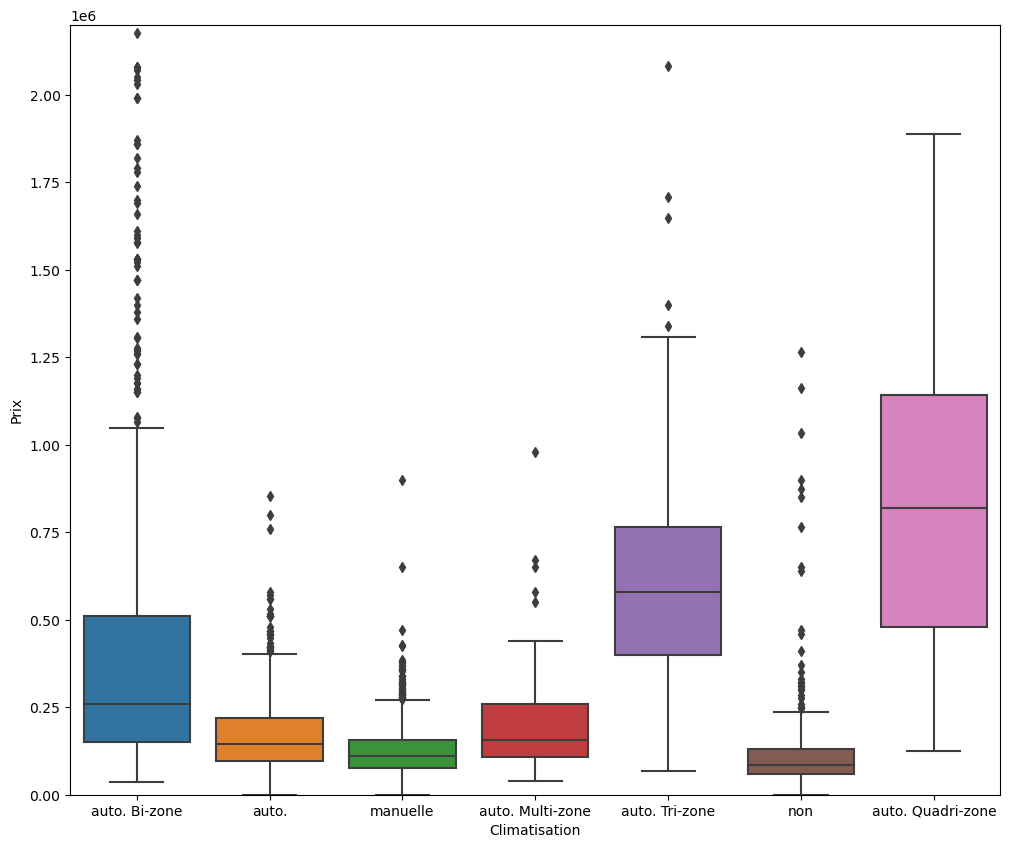

In [69]:
# Visualize relationship between price and Climatisation
plt.figure(figsize=(12, 10))
sns.boxplot(x = 'Climatisation', y = 'Prix - DH', data = wandaloo_cars)
plt.ylim(0, 2.200000e+06)
plt.xlabel('Climatisation')
plt.ylabel('Prix')
plt.show()

In [70]:
# Get median price per Climatisation type
wandaloo_cars.groupby('Climatisation').median()['Prix - DH']

Climatisation
auto.                145000.0
auto. Bi-zone        259450.0
auto. Multi-zone     157000.0
auto. Quadri-zone    820000.0
auto. Tri-zone       580000.0
manuelle             110000.0
non                   85000.0
Name: Prix - DH, dtype: float64

In [71]:
wandaloo_cars.loc[(wandaloo_cars['Climatisation'].isna()) & (wandaloo_cars['Prix - DH'] < 85000.0 ), 'Climatisation'] = 'non'
wandaloo_cars.loc[(wandaloo_cars['Climatisation'].isna()) & (wandaloo_cars['Prix - DH'] > 85000.0 ) & (wandaloo_cars['Prix - DH'] < 145000.0 ), 'Climatisation'] = 'manuelle'
wandaloo_cars.loc[(wandaloo_cars['Climatisation'].isna()) & (wandaloo_cars['Prix - DH'] > 580000.0 ) & (wandaloo_cars['Prix - DH'] < 820000.0 ), 'Climatisation'] = 'auto. Tri-zone'
wandaloo_cars.loc[(wandaloo_cars['Climatisation'].isna()) & (wandaloo_cars['Prix - DH'] > 259450.0 ) & (wandaloo_cars['Prix - DH'] < 580000.0 ), 'Climatisation'] = 'auto. Bi-zone'
wandaloo_cars.loc[(wandaloo_cars['Climatisation'].isna()) & (wandaloo_cars['Prix - DH'] > 820000.0 ), 'Climatisation'] = 'auto. Quadri-zone'
wandaloo_cars.loc[(wandaloo_cars['Climatisation'].isna()) & (wandaloo_cars['Prix - DH'] > 145000.0 ), 'Climatisation'] = 'auto.'

In [72]:
wandaloo_cars['Climatisation'].isna().sum()

0

In [73]:
wandaloo_cars.isna().sum()

Brand                                     0
Model                                     0
Version                                   0
Prix - DH                                 0
Modèle                                    0
Main                                      0
Kilométrage                               0
Carburant                                 0
Transmision                               0
Puissance fiscale en cv                   0
Couleur extérieure                        0
Etat du véhicule                          0
Climatisation                             0
Vitres électriques                       15
Sièges électriques                       35
Ordinateur de bord                       15
Start & Stop                             15
Régulateur de vitesse                    15
Allumage auto. des feux                  15
Détecteur de pluie                       15
Commandes au volant                      15
Ecran tactile                            15
Rétroviseurs électriques        

## Task10 : Dealing with missing data of others columns

In [74]:
wandaloo_cars['Vitres électriques'].value_counts()

Electrique AV/AR    1935
Electrique AV        657
-                    445
non                    8
Electrique AR          3
Name: Vitres électriques, dtype: int64

In [75]:
wandaloo_cars['Vitres électriques']=wandaloo_cars['Vitres électriques'].replace("-","Electrique AV")
wandaloo_cars['Vitres électriques']=wandaloo_cars['Vitres électriques'].replace("non","Pas de vitres électriques")
wandaloo_cars['Vitres électriques']=wandaloo_cars['Vitres électriques'].fillna("Electrique AV/AR")

In [76]:
wandaloo_cars['Sièges électriques'].value_counts()

non                       2006
Conducteur et Passager     594
Conducteur                 340
Tous les passagers          76
Passager                    12
Name: Sièges électriques, dtype: int64

In [77]:
wandaloo_cars['Sièges électriques']=wandaloo_cars['Sièges électriques'].fillna("non")
wandaloo_cars['Sièges électriques']=wandaloo_cars['Sièges électriques'].replace("non","Pas de sièges électriques")

In [78]:
wandaloo_cars['Ordinateur de bord'].value_counts()

oui    2192
non     856
Name: Ordinateur de bord, dtype: int64

In [79]:
#Replace missing values with the most frequent value
wandaloo_cars['Ordinateur de bord']=wandaloo_cars['Ordinateur de bord'].fillna("oui")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Ordinateur de bord']=wandaloo_cars['Ordinateur de bord'].map({'oui':1,'non':0})

In [80]:
wandaloo_cars['Start & Stop'].value_counts()

non    1775
oui    1273
Name: Start & Stop, dtype: int64

In [81]:
#Replace missing values with the most frequent value
wandaloo_cars['Start & Stop']=wandaloo_cars['Start & Stop'].fillna("non")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Start & Stop']=wandaloo_cars['Start & Stop'].map({'oui':1,'non':0})

In [82]:
wandaloo_cars['Régulateur de vitesse'].value_counts()

oui    2186
non     862
Name: Régulateur de vitesse, dtype: int64

In [83]:
#Replace missing values with the most frequent value
wandaloo_cars['Régulateur de vitesse']=wandaloo_cars['Régulateur de vitesse'].fillna("oui")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Régulateur de vitesse']=wandaloo_cars['Régulateur de vitesse'].map({'oui':1,'non':0})

In [84]:
wandaloo_cars['Allumage auto. des feux'].value_counts()

oui    1742
non    1306
Name: Allumage auto. des feux, dtype: int64

In [85]:
#Replace missing values with the most frequent value
wandaloo_cars['Allumage auto. des feux']=wandaloo_cars['Allumage auto. des feux'].fillna("oui")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Allumage auto. des feux']=wandaloo_cars['Allumage auto. des feux'].map({'oui':1,'non':0})

In [86]:
wandaloo_cars['Détecteur de pluie'].value_counts()

oui    1590
non    1458
Name: Détecteur de pluie, dtype: int64

In [87]:
#Replace missing values with the most frequent value
wandaloo_cars['Détecteur de pluie']=wandaloo_cars['Détecteur de pluie'].fillna("oui")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Détecteur de pluie']=wandaloo_cars['Détecteur de pluie'].map({'oui':1,'non':0})

In [88]:
wandaloo_cars['Commandes au volant'].value_counts()

oui    2132
non     916
Name: Commandes au volant, dtype: int64

In [89]:
#Replace missing values with the most frequent value
wandaloo_cars['Commandes au volant']=wandaloo_cars['Commandes au volant'].fillna("oui")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Commandes au volant']=wandaloo_cars['Commandes au volant'].map({'oui':1,'non':0})

In [90]:
wandaloo_cars['Ecran tactile'].value_counts()

oui    1662
non    1386
Name: Ecran tactile, dtype: int64

In [91]:
#Replace missing values with the most frequent value
wandaloo_cars['Ecran tactile']=wandaloo_cars['Ecran tactile'].fillna("oui")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Ecran tactile']=wandaloo_cars['Ecran tactile'].map({'oui':1,'non':0})

In [92]:
wandaloo_cars['Rétroviseurs électriques'].value_counts()

oui    2139
non     909
Name: Rétroviseurs électriques, dtype: int64

In [93]:
#Replace missing values with the most frequent value
wandaloo_cars['Rétroviseurs électriques']=wandaloo_cars['Rétroviseurs électriques'].fillna("oui")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Rétroviseurs électriques']=wandaloo_cars['Rétroviseurs électriques'].map({'oui':1,'non':0})

In [94]:
wandaloo_cars['Ouverture auto. du coffre'].value_counts()

non    1774
oui     406
Name: Ouverture auto. du coffre, dtype: int64

In [95]:
#Replace missing values with the most frequent value
wandaloo_cars['Ouverture auto. du coffre']=wandaloo_cars['Ouverture auto. du coffre'].fillna("non")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Ouverture auto. du coffre']=wandaloo_cars['Ouverture auto. du coffre'].map({'oui':1,'non':0})

In [96]:
wandaloo_cars['Démarrage mains libres'].value_counts()

non    1666
oui    1382
Name: Démarrage mains libres, dtype: int64

In [97]:
#Replace missing values with the most frequent value
wandaloo_cars['Démarrage mains libres']=wandaloo_cars['Démarrage mains libres'].fillna("non")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Démarrage mains libres']=wandaloo_cars['Démarrage mains libres'].map({'oui':1,'non':0})

In [98]:
wandaloo_cars['Banquette arrière rabattable 1/3-2/3'].value_counts()

oui    1655
non    1393
Name: Banquette arrière rabattable 1/3-2/3, dtype: int64

In [99]:
#Replace missing values with the most frequent value
wandaloo_cars['Banquette arrière rabattable 1/3-2/3']=wandaloo_cars['Banquette arrière rabattable 1/3-2/3'].fillna("oui")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Banquette arrière rabattable 1/3-2/3']=wandaloo_cars['Banquette arrière rabattable 1/3-2/3'].map({'oui':1,'non':0})

In [100]:
wandaloo_cars['Caméra de recul'].value_counts()

non    1706
oui    1342
Name: Caméra de recul, dtype: int64

In [101]:
#Replace missing values with the most frequent value
wandaloo_cars['Caméra de recul']=wandaloo_cars['Caméra de recul'].fillna("non")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Caméra de recul']=wandaloo_cars['Caméra de recul'].map({'oui':1,'non':0})

In [102]:
wandaloo_cars['Bluetooth'].value_counts()

oui    2116
non     932
Name: Bluetooth, dtype: int64

In [103]:
#Replace missing values with the most frequent value
wandaloo_cars['Bluetooth']=wandaloo_cars['Bluetooth'].fillna("oui")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Bluetooth']=wandaloo_cars['Bluetooth'].map({'oui':1,'non':0})

In [104]:
wandaloo_cars['Jantes aluminium'].value_counts()

oui    2211
non     837
Name: Jantes aluminium, dtype: int64

In [105]:
#Replace missing values with the most frequent value
wandaloo_cars['Jantes aluminium']=wandaloo_cars['Jantes aluminium'].fillna("oui")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Jantes aluminium']=wandaloo_cars['Jantes aluminium'].map({'oui':1,'non':0})

In [106]:
wandaloo_cars['Volant cuir'].value_counts()

non    1830
oui    1218
Name: Volant cuir, dtype: int64

In [107]:
#Replace missing values with the most frequent value
wandaloo_cars['Volant cuir']=wandaloo_cars['Volant cuir'].fillna("non")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Volant cuir']=wandaloo_cars['Volant cuir'].map({'oui':1,'non':0})

In [108]:
wandaloo_cars['Feux de jour'].value_counts()

oui    1870
non    1178
Name: Feux de jour, dtype: int64

In [109]:
#Replace missing values with the most frequent value
wandaloo_cars['Feux de jour']=wandaloo_cars['Feux de jour'].fillna("oui")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Feux de jour']=wandaloo_cars['Feux de jour'].map({'oui':1,'non':0})

In [110]:
wandaloo_cars['Barres de toit'].value_counts()

non    2316
oui     732
Name: Barres de toit, dtype: int64

In [111]:
#Replace missing values with the most frequent value
wandaloo_cars['Barres de toit']=wandaloo_cars['Barres de toit'].fillna("non")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Barres de toit']=wandaloo_cars['Barres de toit'].map({'oui':1,'non':0})

In [112]:
wandaloo_cars['Toit'].value_counts()

Rigide                 2394
Panoramique ouvrant     362
Panoramique             198
Ouvrant                  94
Name: Toit, dtype: int64

In [113]:
#Replace missing values with the most frequent value
wandaloo_cars['Toit']=wandaloo_cars['Toit'].fillna("Rigide")

In [114]:
wandaloo_cars['Airbags'].value_counts()

oui    2783
non     265
Name: Airbags, dtype: int64

In [115]:
#Replace missing values with the most frequent value
wandaloo_cars['Airbags']=wandaloo_cars['Airbags'].fillna("oui")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Airbags']=wandaloo_cars['Airbags'].map({'oui':1,'non':0})

In [116]:
wandaloo_cars['ABS'].value_counts()

oui    2704
non     344
Name: ABS, dtype: int64

In [117]:
#Replace missing values with the most frequent value
wandaloo_cars['ABS']=wandaloo_cars['ABS'].fillna("oui")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['ABS']=wandaloo_cars['ABS'].map({'oui':1,'non':0})

In [118]:
wandaloo_cars['ESP'].value_counts()

oui    2235
non     813
Name: ESP, dtype: int64

In [119]:
#Replace missing values with the most frequent value
wandaloo_cars['ESP']=wandaloo_cars['ESP'].fillna("oui")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['ESP']=wandaloo_cars['ESP'].map({'oui':1,'non':0})

In [120]:
wandaloo_cars['Antipatinage'].value_counts()

oui    2094
non     954
Name: Antipatinage, dtype: int64

In [121]:
#Replace missing values with the most frequent value
wandaloo_cars['Antipatinage']=wandaloo_cars['Antipatinage'].fillna("oui")
#Replace "oui" with 1 and "non" with 0
wandaloo_cars['Antipatinage']=wandaloo_cars['Antipatinage'].map({'oui':1,'non':0})

In [122]:
wandaloo_cars.isna().sum()

Brand                                   0
Model                                   0
Version                                 0
Prix - DH                               0
Modèle                                  0
Main                                    0
Kilométrage                             0
Carburant                               0
Transmision                             0
Puissance fiscale en cv                 0
Couleur extérieure                      0
Etat du véhicule                        0
Climatisation                           0
Vitres électriques                      0
Sièges électriques                      0
Ordinateur de bord                      0
Start & Stop                            0
Régulateur de vitesse                   0
Allumage auto. des feux                 0
Détecteur de pluie                      0
Commandes au volant                     0
Ecran tactile                           0
Rétroviseurs électriques                0
Ouverture auto. du coffre         

# Part 4 : Data visualization and exploration

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


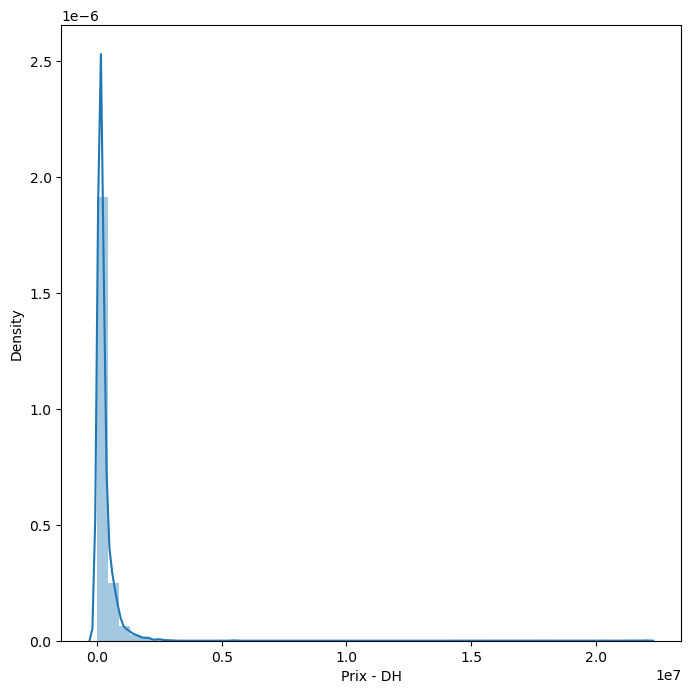

In [123]:
plt.figure(figsize=(8, 8))
m1 = sns.distplot(wandaloo_cars['Prix - DH'])

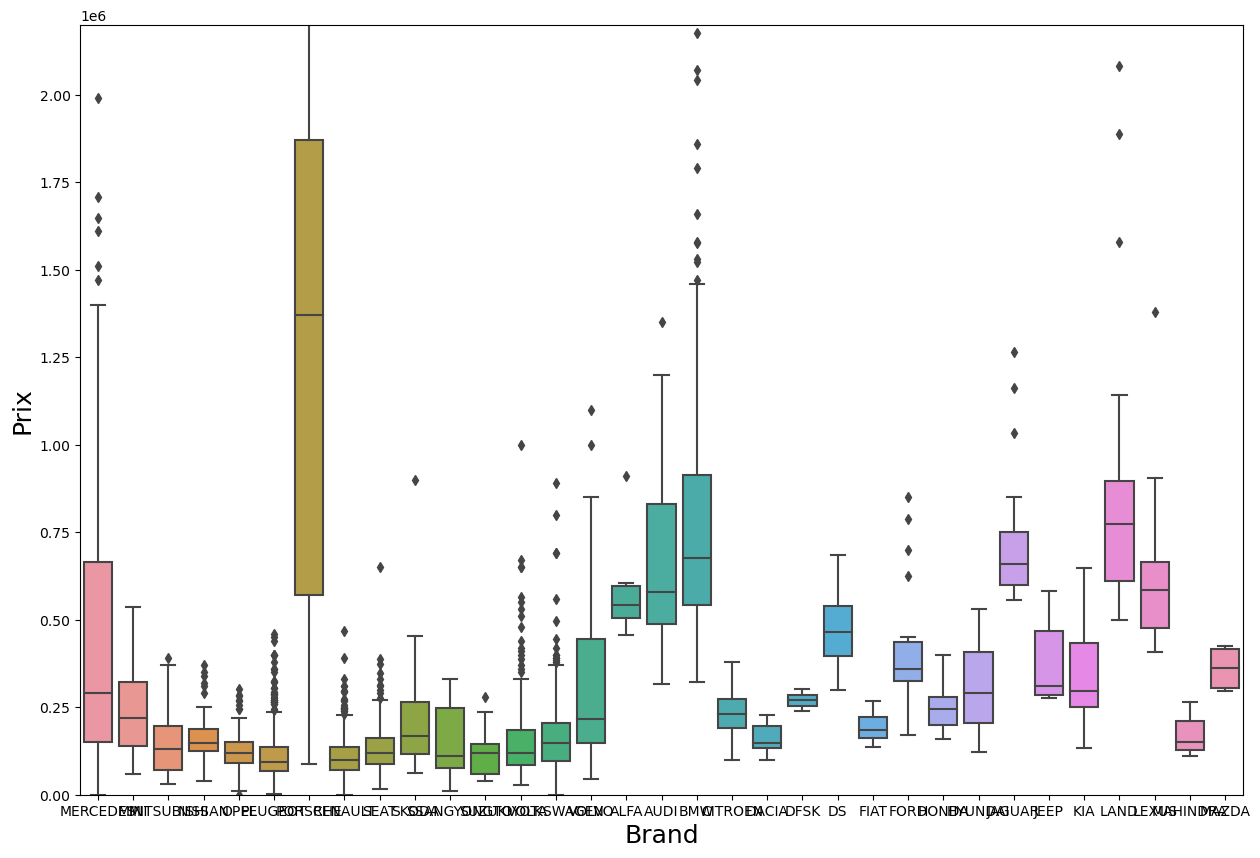

In [124]:
# Visualize relationship between price and Brand
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Brand', y = 'Prix - DH', data = wandaloo_cars)
plt.ylim(0, 2.200000e+06)
plt.xlabel('Brand',fontsize=18)
plt.ylabel('Prix',fontsize=18)
plt.show()

## C/c: The price of a car is impacted by the brand. 

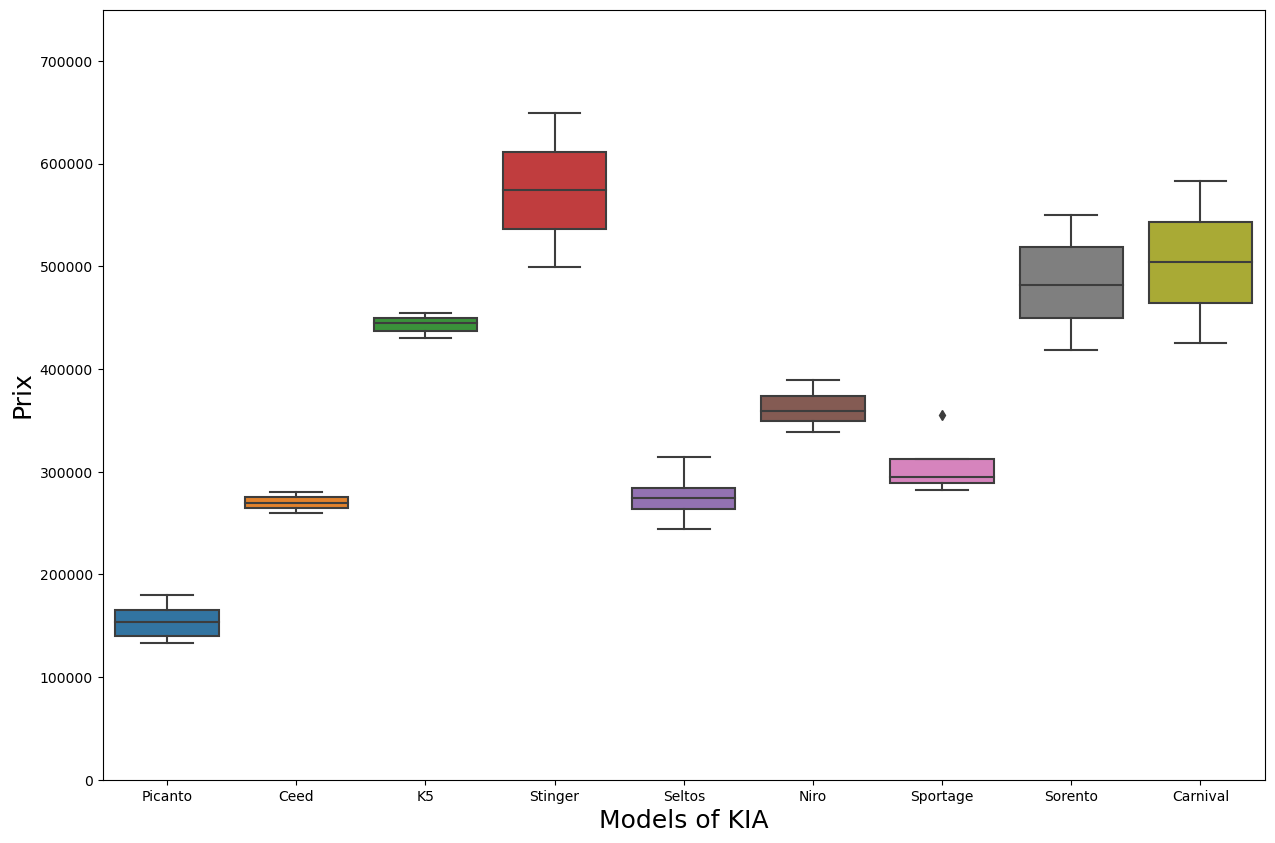

In [125]:
# Visualize relationship between price and Model
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Model', y = 'Prix - DH', data = wandaloo_cars[wandaloo_cars.Brand=="KIA"])
plt.ylim(0, 7.500000e+05)
plt.xlabel('Models of KIA',fontsize=18)
plt.ylabel('Prix',fontsize=18)
plt.show()

## C/c: The price of a car is impacted by the Model of the Brand. 

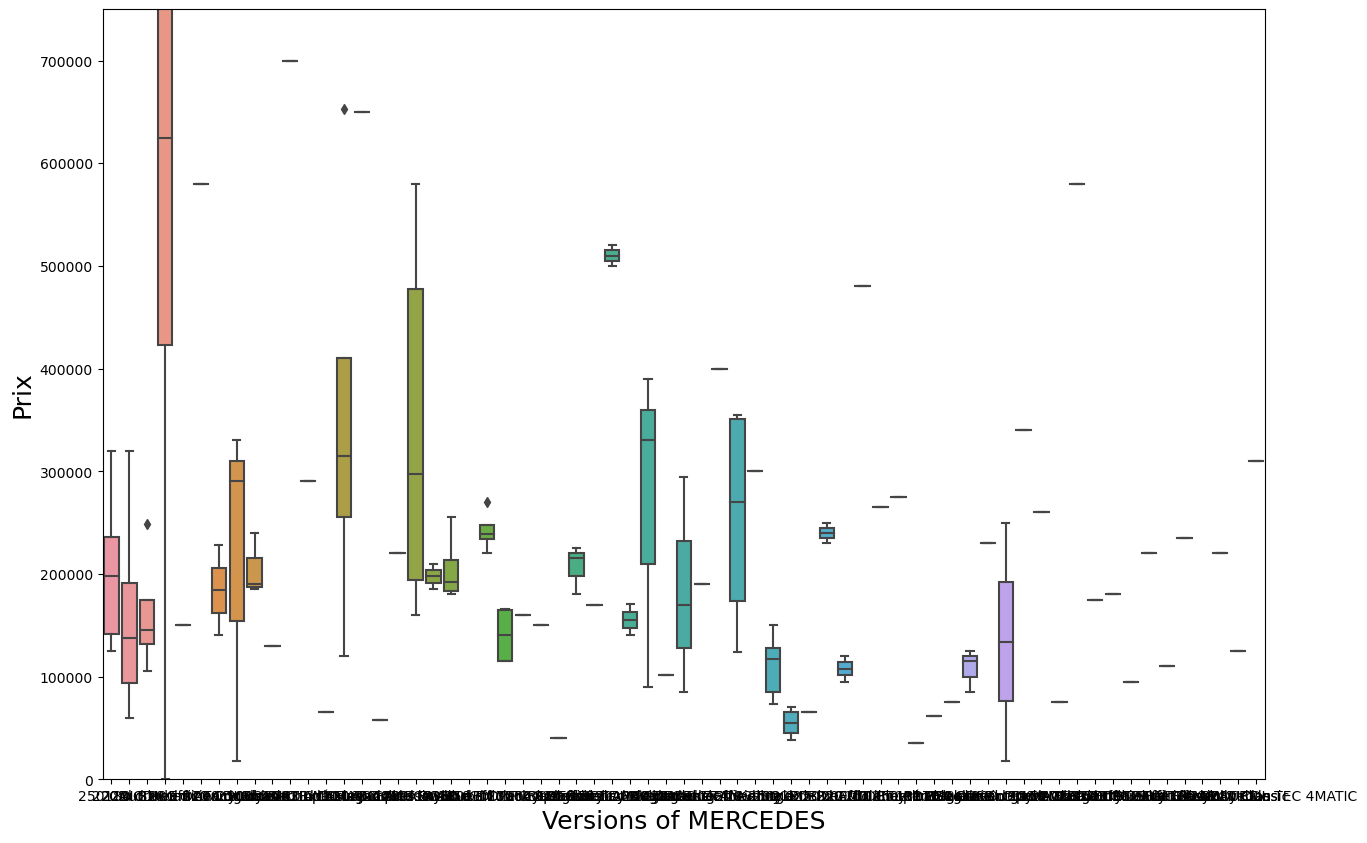

In [126]:
# Visualize relationship between price and Version
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Version', y = 'Prix - DH', data = wandaloo_cars[wandaloo_cars.Brand=="MERCEDES"])
plt.ylim(0, 7.500000e+05)
plt.xlabel('Versions of MERCEDES',fontsize=18)
plt.ylabel('Prix',fontsize=18)
plt.show()

## C/c: The price of a car is impacted by the Version of the Model. 

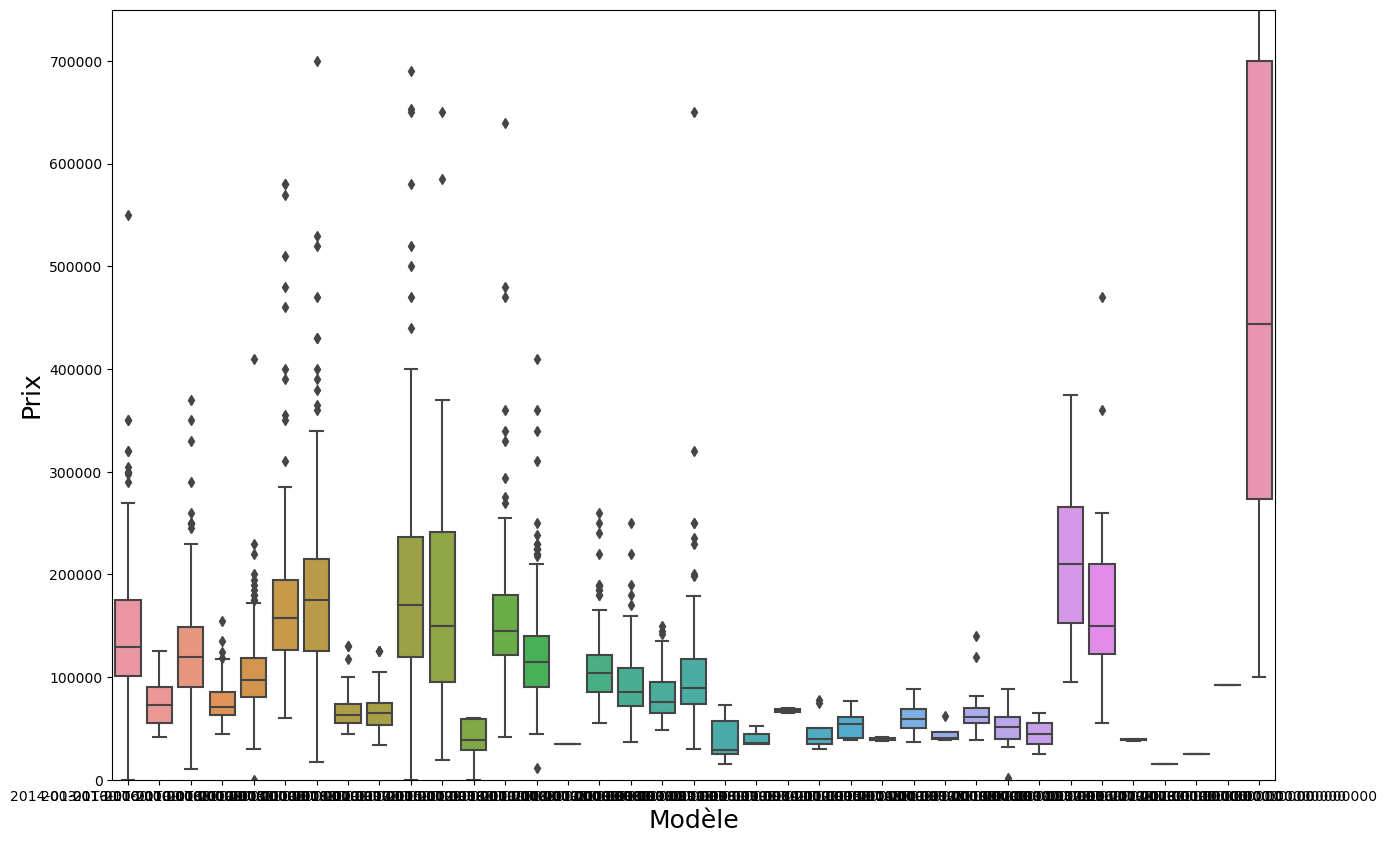

In [127]:
# Visualize relationship between price and Modèle
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Modèle', y = 'Prix - DH', data = wandaloo_cars)
plt.ylim(0, 7.500000e+05)
plt.xlabel('Modèle',fontsize=18)
plt.ylabel('Prix',fontsize=18)
plt.show()

## C/c: The price of a car is impacted by the Modèle. 


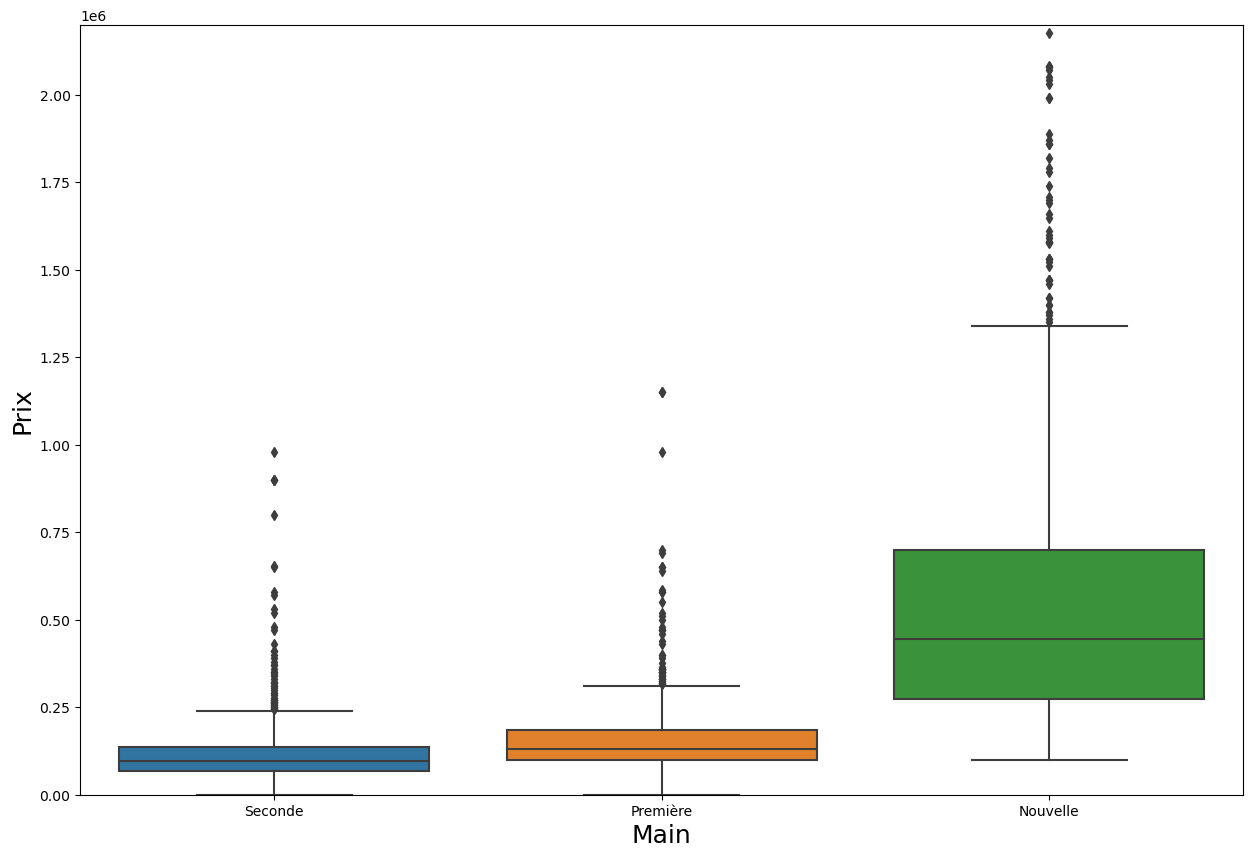

In [128]:
# Visualize relationship between price and Main
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Main', y = 'Prix - DH', data = wandaloo_cars)
plt.ylim(0, 2.200000e+06)
plt.xlabel('Main',fontsize=18)
plt.ylabel('Prix',fontsize=18)
plt.show()

## C/c: The price of a car is impacted by the Main. 

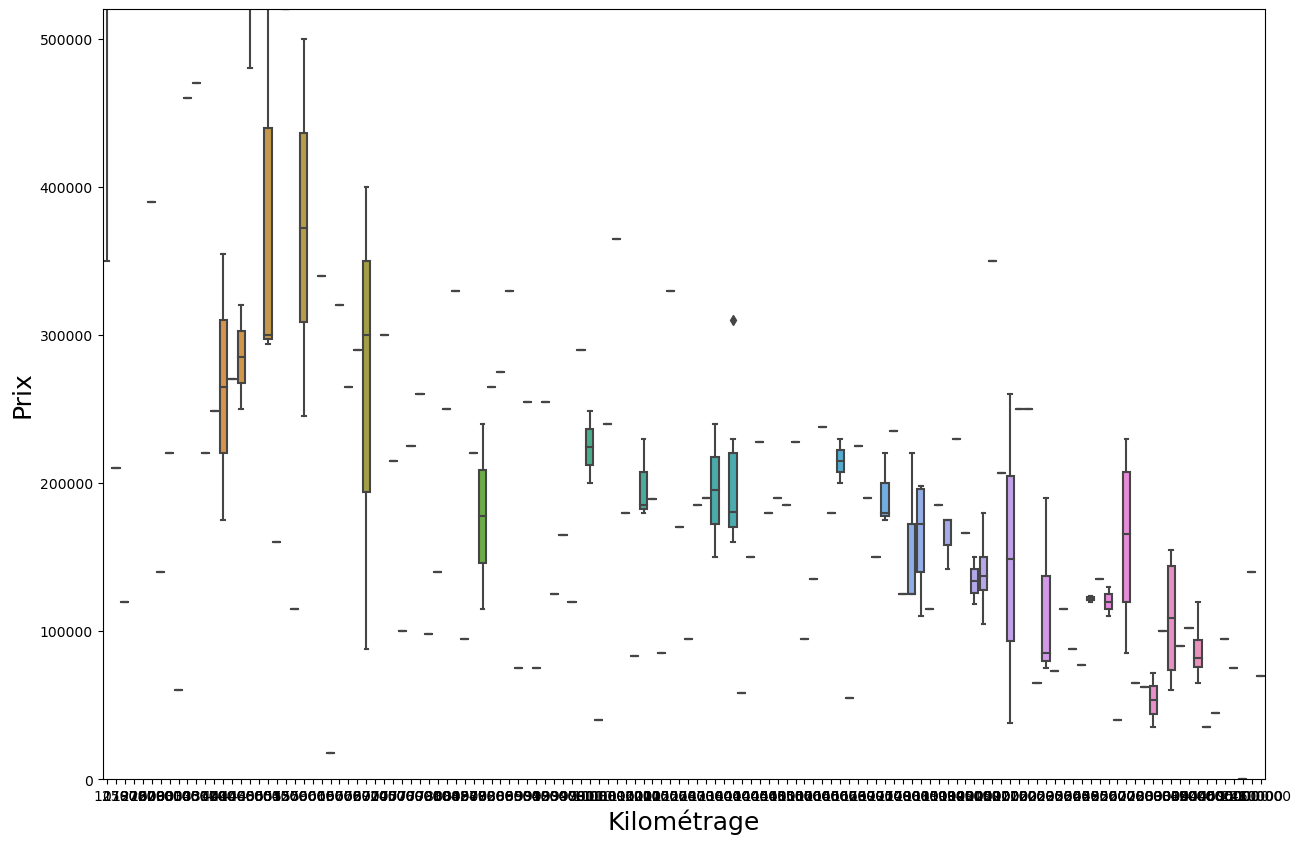

In [129]:
# Visualize relationship between price and Kilométrage
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Kilométrage', y = 'Prix - DH', data = wandaloo_cars[wandaloo_cars.Brand=="MERCEDES"])
plt.ylim(0, 5.200000e+05)
plt.xlabel('Kilométrage',fontsize=18)
plt.ylabel('Prix',fontsize=18)
plt.show()

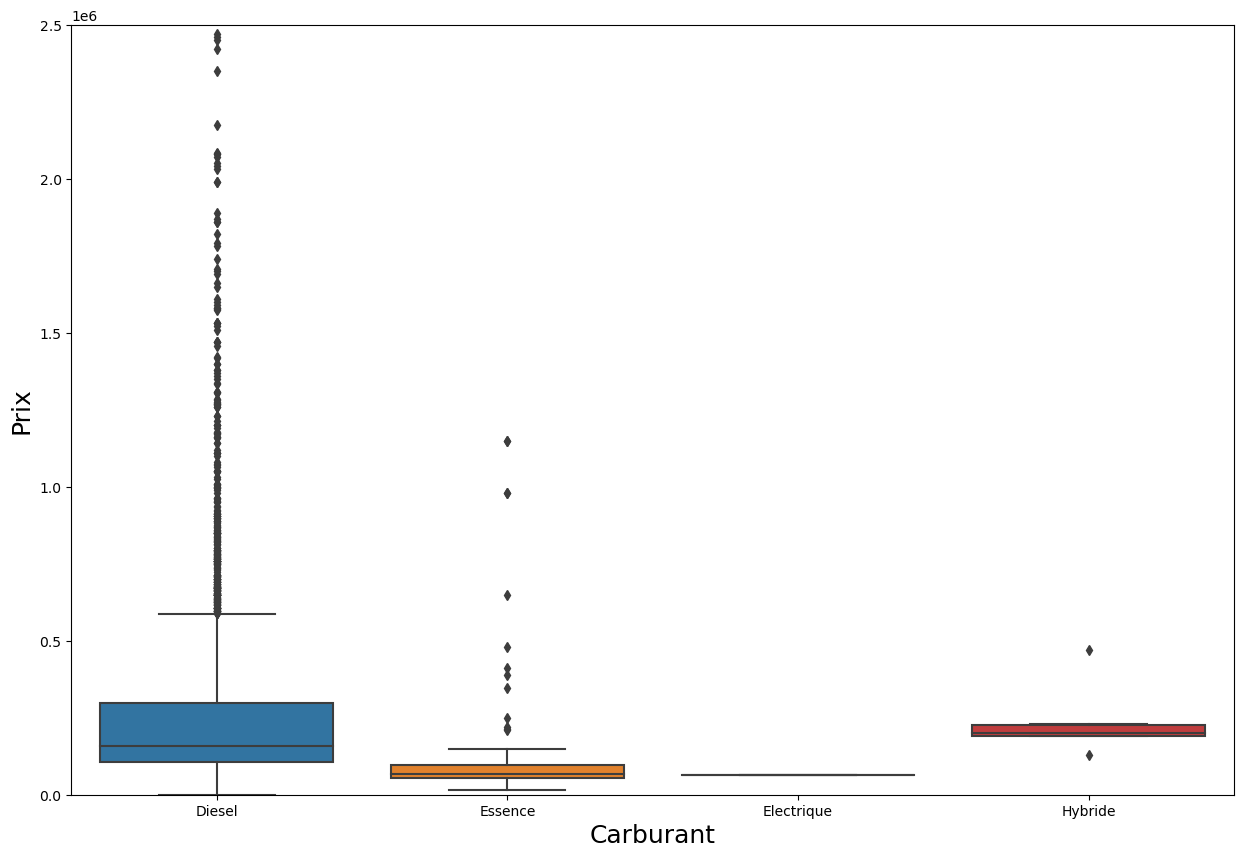

In [130]:
# Visualize relationship between price and fuel type
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Carburant', y = 'Prix - DH', data = wandaloo_cars)
plt.ylim(0, 2.500000e+06)
plt.xlabel('Carburant',fontsize=18)
plt.ylabel('Prix',fontsize=18)
plt.show()

## C/c: The price of a car is impacted by the fuel type. 

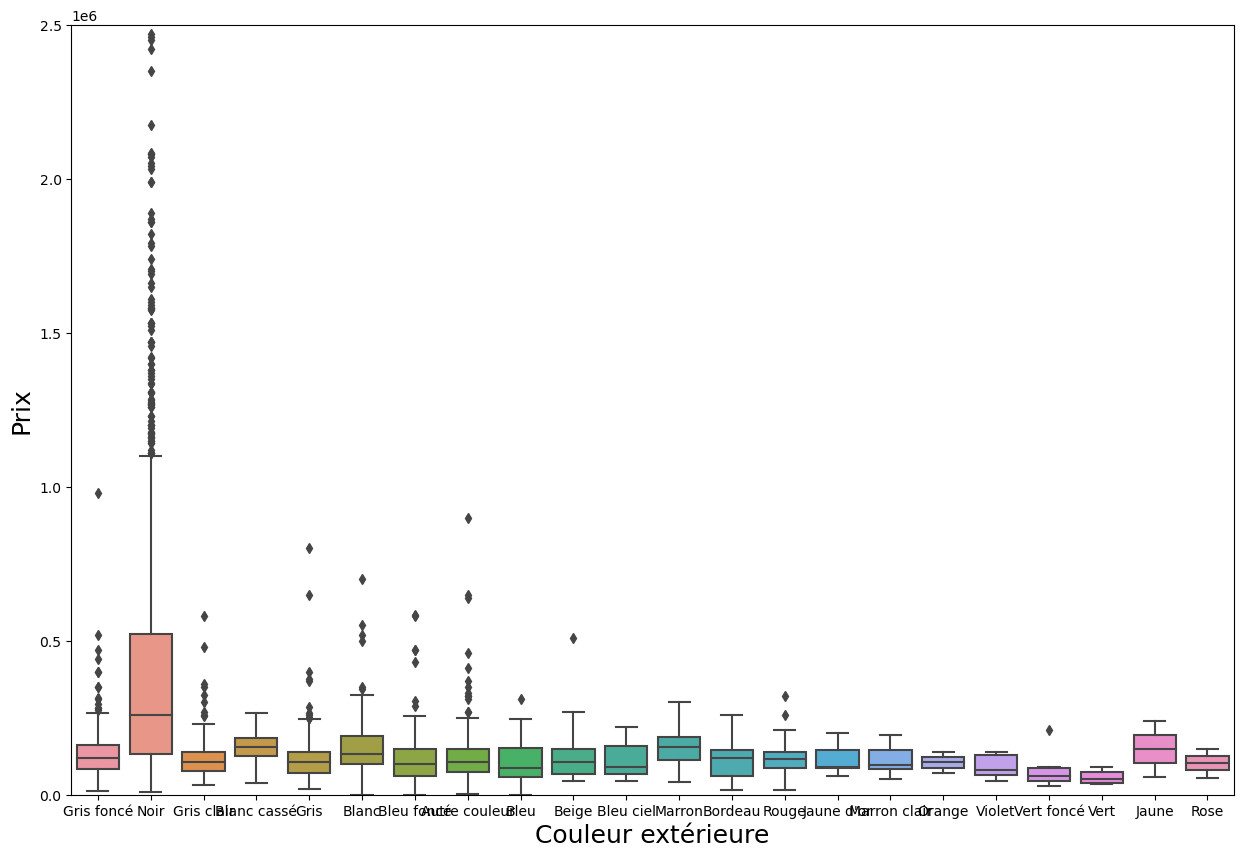

In [131]:
# Visualize relationship between price and Color
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Couleur extérieure', y = 'Prix - DH', data = wandaloo_cars)
plt.ylim(0, 2.500000e+06)
plt.xlabel('Couleur extérieure',fontsize=18)
plt.ylabel('Prix',fontsize=18)
plt.show()

## C/c: The price of a car is impacted by the Color. 

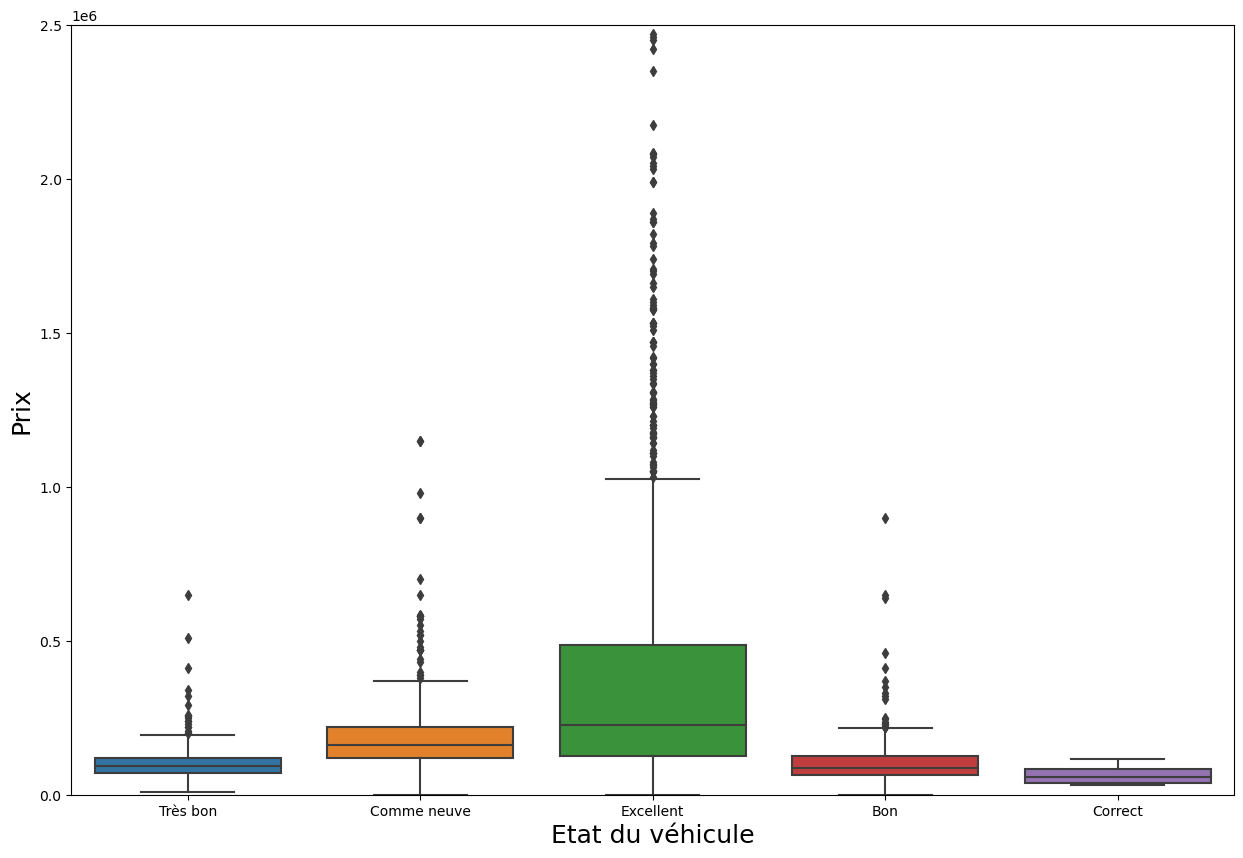

In [132]:
# Visualize relationship between price and "Etat du véhicule"
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Etat du véhicule', y = 'Prix - DH', data = wandaloo_cars)
plt.ylim(0, 2.500000e+06)
plt.xlabel('Etat du véhicule',fontsize=18)
plt.ylabel('Prix',fontsize=18)
plt.show()

## C/c: The price of a car is impacted by the State of the car. 

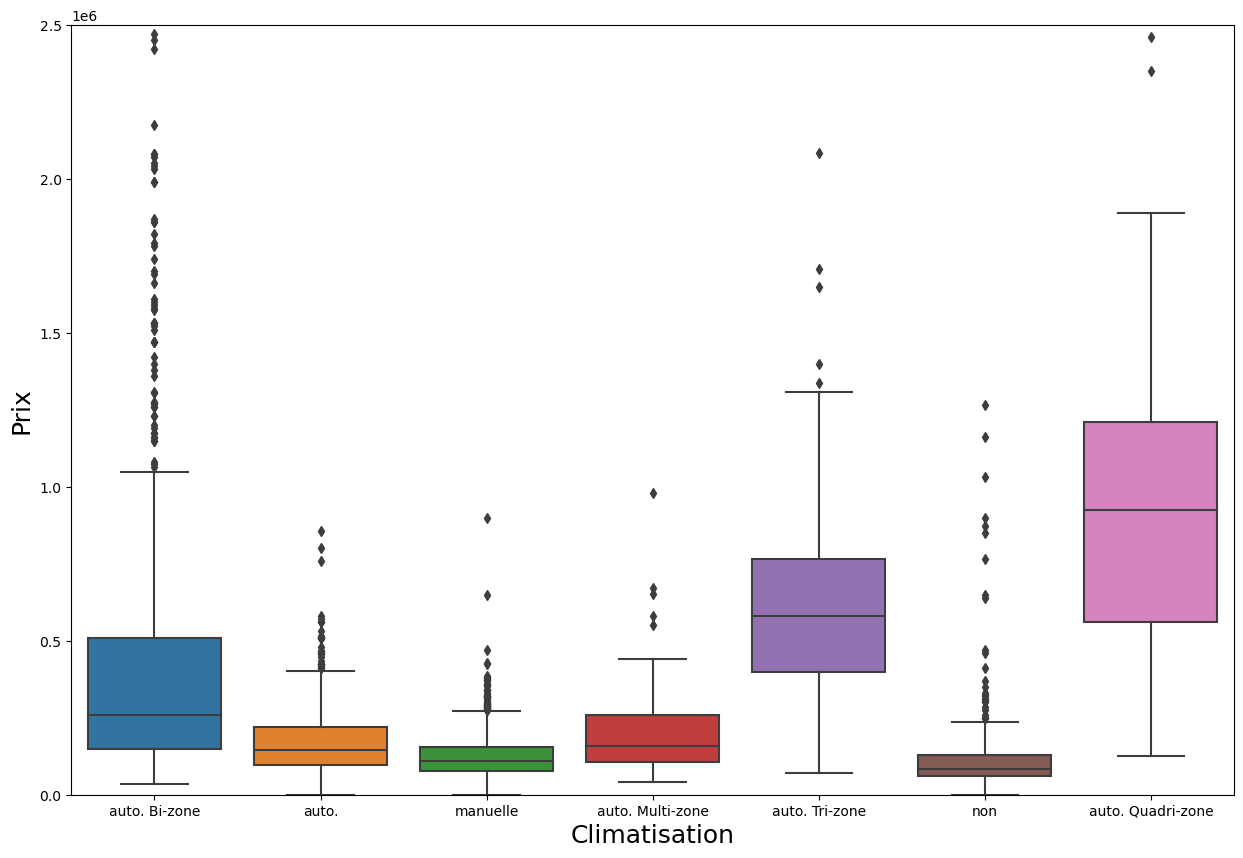

In [133]:
# Visualize relationship between price and Climatisation
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Climatisation', y = 'Prix - DH', data = wandaloo_cars)
plt.ylim(0, 2.500000e+06)
plt.xlabel('Climatisation',fontsize=18)
plt.ylabel('Prix',fontsize=18)
plt.show()

## C/c: The price of a car is impacted by the Climatisation type. 

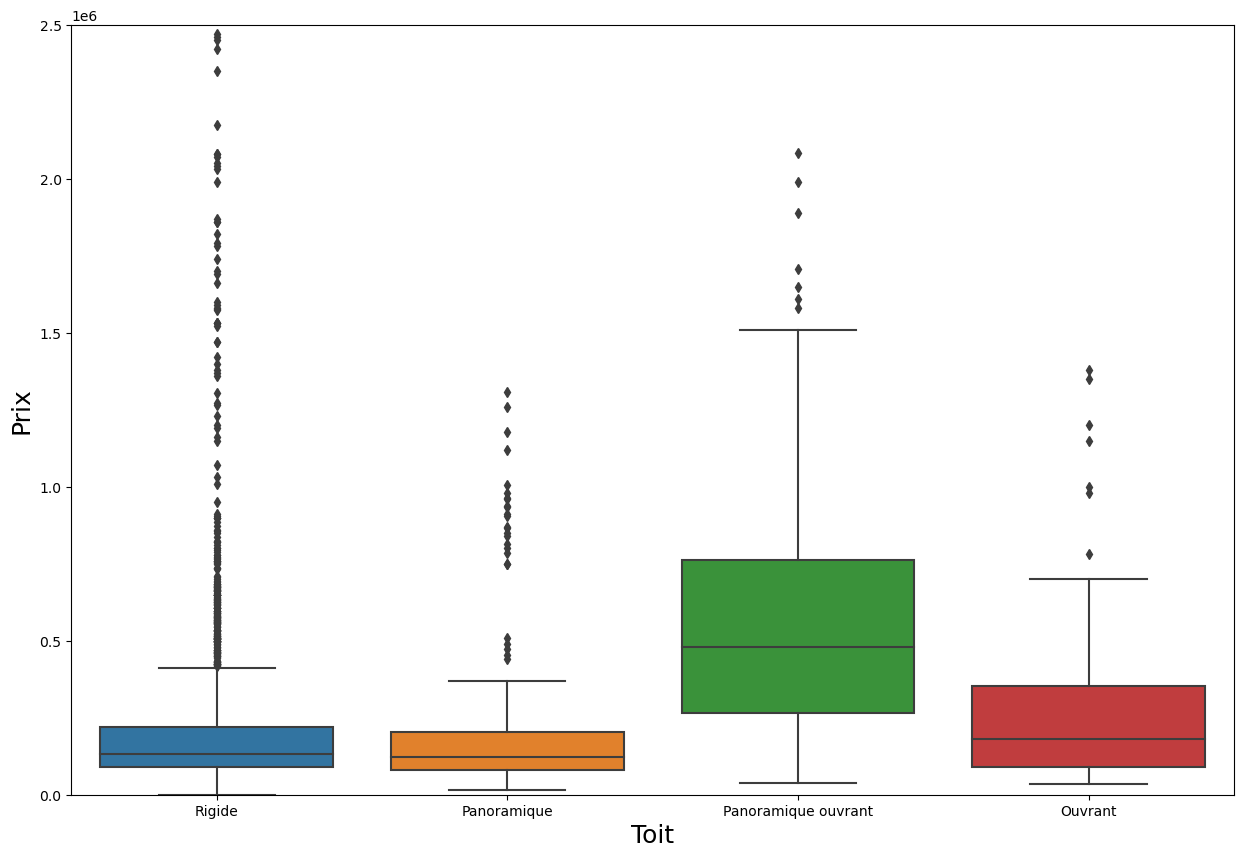

In [134]:
# Visualize relationship between price and Toit
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Toit', y = 'Prix - DH', data = wandaloo_cars)
plt.ylim(0, 2.500000e+06)
plt.xlabel('Toit',fontsize=18)
plt.ylabel('Prix',fontsize=18)
plt.show()

## C/c: The price of a car is impacted by the car top. 

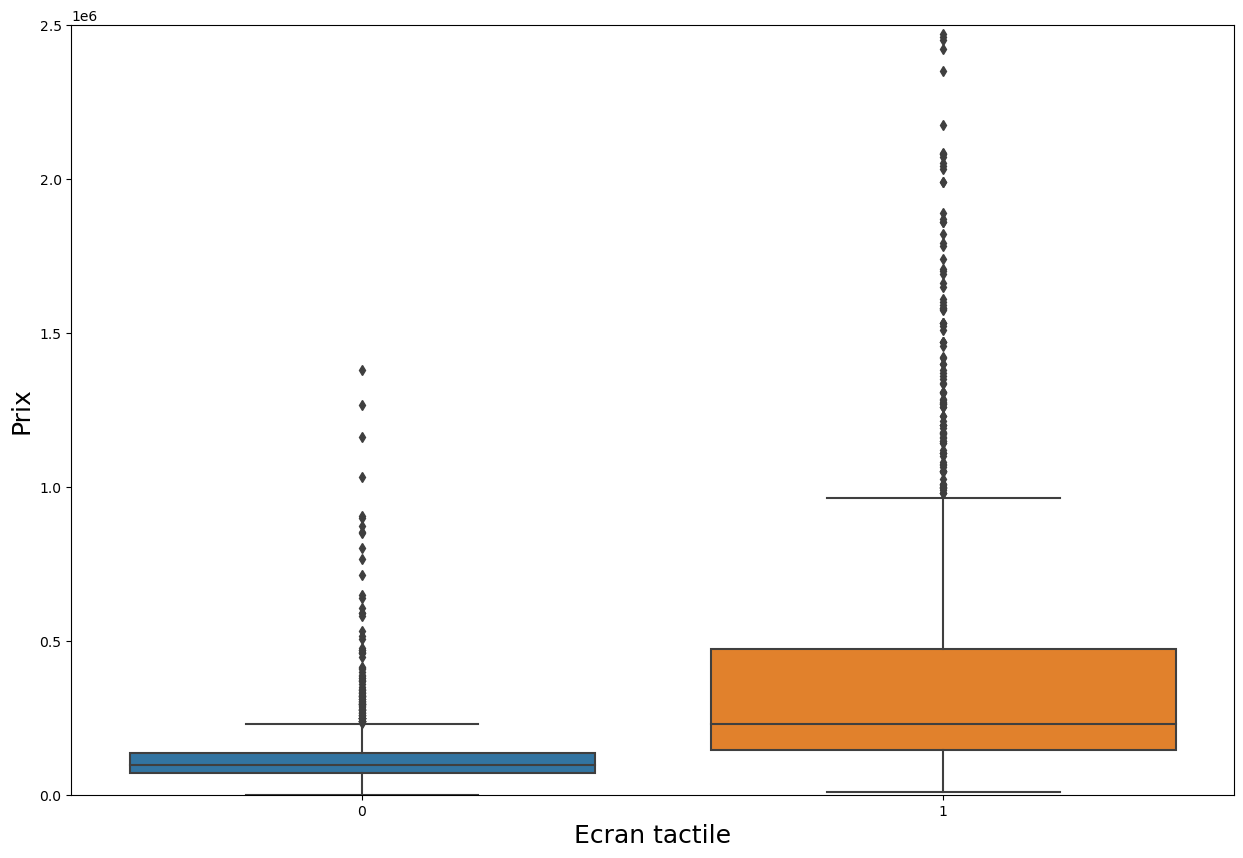

In [135]:
# Visualize relationship between price and Ecran tactile
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Ecran tactile', y = 'Prix - DH', data = wandaloo_cars)
plt.ylim(0, 2.500000e+06)
plt.xlabel('Ecran tactile',fontsize=18)
plt.ylabel('Prix',fontsize=18)
plt.show()

## C/c: The price of a car is impacted by the Smart screen. 

# Part 5 : Dealing with duplicate data

In [136]:
wandaloo_cars.head()

,Brand,Model,Version,Prix - DH,Modèle,Main,Kilométrage,Carburant,Transmision,Puissance fiscale en cv,...,Bluetooth,Jantes aluminium,Volant cuir,Feux de jour,Barres de toit,Toit,Airbags,ABS,ESP,Antipatinage
0,MERCEDES,Classe C 2014,220 d,228000.0,2014-01-01,Seconde,144500,Diesel,1,8,...,1,1,1,1,0,Rigide,1,1,1,1
1,MERCEDES,Classe C 2003,220 CDI,79000.0,2003-01-01,Seconde,350000,Diesel,0,8,...,1,1,0,1,0,Rigide,1,1,1,1
2,MERCEDES,Classe B 2013,180 d Urban,150000.0,2013-01-01,Seconde,144000,Diesel,0,8,...,1,1,1,1,0,Rigide,1,1,1,1
3,MERCEDES,Classe E 2006,Autre version,135000.0,2006-01-01,Seconde,248000,Diesel,1,9,...,1,1,0,1,1,Rigide,1,1,1,1
4,MERCEDES,CLA Coupé 2014,220 CDI,240000.0,2014-01-01,Seconde,103000,Diesel,1,9,...,1,1,0,1,0,Panoramique,1,1,1,1


In [137]:
# Find duplicates
duplicates = wandaloo_cars.duplicated(subset = 'Model', keep = False)
wandaloo_cars[duplicates].sort_values('Model')

,Brand,Model,Version,Prix - DH,Modèle,Main,Kilométrage,Carburant,Transmision,Puissance fiscale en cv,...,Bluetooth,Jantes aluminium,Volant cuir,Feux de jour,Barres de toit,Toit,Airbags,ABS,ESP,Antipatinage
757,PEUGEOT,107 2013,1.1 Urban,68000.0,2013-01-01,Seconde,28500,Essence,1,6,...,0,0,0,0,0,Rigide,0,0,0,0
756,PEUGEOT,107 2013,1.1 Urban,62000.0,2013-01-01,Seconde,28500,Essence,1,6,...,0,0,0,0,0,Rigide,0,0,0,0
815,PEUGEOT,107 2013,1.1 Urban,72000.0,2013-01-01,Première,55000,Essence,1,6,...,0,0,0,0,0,Rigide,1,1,1,0
158,MERCEDES,190 1991,2.0 D,70000.0,1991-01-01,Seconde,4100000,Diesel,1,8,...,0,0,0,0,0,Panoramique ouvrant,1,1,0,0
62,MERCEDES,190 1991,2.5 D,65000.0,1991-01-01,Seconde,350000,Diesel,0,8,...,0,0,0,0,0,Rigide,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,BMW,i4,Autre version,978000.0,2023-01-01,Nouvelle,0,Diesel,0,25,...,1,1,1,1,0,Panoramique ouvrant,1,1,1,1
2452,BMW,iX,Autre version,1309000.0,2023-01-01,Nouvelle,0,Diesel,0,25,...,1,1,1,1,0,Panoramique,1,1,1,1
2449,BMW,iX,Autre version,1005000.0,2023-01-01,Nouvelle,0,Diesel,0,15,...,1,1,1,1,0,Panoramique,1,1,1,1
2450,BMW,iX,Autre version,1120000.0,2023-01-01,Nouvelle,0,Diesel,0,15,...,1,1,1,1,0,Panoramique,1,1,1,1


In [138]:
# Remove identical duplicates
wandaloo_cars = wandaloo_cars.drop_duplicates()

In [139]:
wandaloo_cars.dtypes

Brand                                           object
Model                                           object
Version                                         object
Prix - DH                                      float64
Modèle                                  datetime64[ns]
Main                                            object
Kilométrage                                      int32
Carburant                                       object
Transmision                                      int64
Puissance fiscale en cv                          int32
Couleur extérieure                              object
Etat du véhicule                                object
Climatisation                                   object
Vitres électriques                              object
Sièges électriques                              object
Ordinateur de bord                               int64
Start & Stop                                     int64
Régulateur de vitesse                            int64
Allumage a

# Part 6 : Data reduction

In [140]:
data=wandaloo_cars
# Create a new dataframe with one-hot encoded Brand,Model,Version,Main,Carburant,Couleur extérieure,Etat du véhicule,Climatisation,Vitres électriques,Sièges électriques,Toit
brand_df = pd.get_dummies(data['Brand'])
model_df = pd.get_dummies(data['Model'])
version_df = pd.get_dummies(data['Version'])
main_df = pd.get_dummies(data['Main'])
carburant_df = pd.get_dummies(data['Carburant'])
couleur_df = pd.get_dummies(data['Couleur extérieure'])
etat_df = pd.get_dummies(data['Etat du véhicule'])
climat_df = pd.get_dummies(data['Climatisation'])
vitres_df = pd.get_dummies(data['Vitres électriques'])
sieges_df = pd.get_dummies(data['Sièges électriques'])
toit_df = pd.get_dummies(data['Toit'])

# Concatenate the original dataframe with the one-hot encoded dataframe
data = pd.concat([data, brand_df], axis=1)
data = pd.concat([data, model_df], axis=1)
data = pd.concat([data, version_df], axis=1)
data = pd.concat([data, main_df], axis=1)
data = pd.concat([data, carburant_df], axis=1)
data = pd.concat([data, couleur_df], axis=1)
data = pd.concat([data, etat_df], axis=1)
data = pd.concat([data, climat_df], axis=1)
data = pd.concat([data, vitres_df], axis=1)
data = pd.concat([data, sieges_df], axis=1)
data = pd.concat([data, toit_df], axis=1)

# Drop the original columns
data=data.drop(columns=['Brand','Model','Version','Main','Carburant','Couleur extérieure','Etat du véhicule','Climatisation','Vitres électriques','Sièges électriques','Toit'])

# Print the updated dataframe
data

,Prix - DH,Modèle,Kilométrage,Transmision,Puissance fiscale en cv,Ordinateur de bord,Start & Stop,Régulateur de vitesse,Allumage auto. des feux,Détecteur de pluie,...,Pas de vitres électriques,Conducteur,Conducteur et Passager,Pas de sièges électriques,Passager,Tous les passagers,Ouvrant,Panoramique,Panoramique ouvrant,Rigide
0,228000.0,2014-01-01,144500,1,8,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
1,79000.0,2003-01-01,350000,0,8,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,1
2,150000.0,2013-01-01,144000,0,8,1,0,1,1,1,...,0,0,0,1,0,0,0,0,0,1
3,135000.0,2006-01-01,248000,1,9,1,0,1,1,1,...,0,0,1,0,0,0,0,0,0,1
4,240000.0,2014-01-01,103000,1,9,1,1,1,1,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,630000.0,2023-01-01,0,1,8,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
3125,730000.0,2023-01-01,0,1,8,1,1,1,1,1,...,0,0,1,0,0,0,0,0,1,0
3126,850000.0,2023-01-01,0,1,8,1,1,1,1,1,...,0,0,1,0,0,0,0,0,1,0
3127,1000000.0,2023-01-01,0,1,11,1,1,1,1,1,...,0,0,1,0,0,0,0,0,1,0


# Part 7 : Model building prediction

In [141]:
from sklearn.preprocessing import StandardScaler
X=data.drop(columns=["Prix - DH","Modèle"])
Y=data["Prix - DH"]

In [142]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=0) 

In [143]:
#classifier
from sklearn.linear_model import LinearRegression
# metrics
from sklearn.metrics import accuracy_score

In [144]:
linearReg = LinearRegression()
linearReg.fit(x_train, y_train);
acc_test=linearReg.score(x_test,y_test)
acc_train=linearReg.score(x_train,y_train)

print("score de performance d'entrainement:",acc_train)
print("score de performance de test:",acc_test)

score de performance d'entrainement: 0.9883229191784942
score de performance de test: 0.8483309846841154


## Task : Applying feature selection to our cleaned dataset and rebuiding the model


In [145]:
from sklearn.preprocessing import StandardScaler
# Standardize the selected features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

In [146]:
data_scaled

array([[ 0.11100937,  1.20084511, -0.04157665, ..., -0.2635603 ,
        -0.36176302,  0.51766455],
       [ 0.71534946, -0.83274686, -0.04157665, ..., -0.2635603 ,
        -0.36176302,  0.51766455],
       [ 0.10953895, -0.83274686, -0.04157665, ..., -0.2635603 ,
        -0.36176302,  0.51766455],
       ...,
       [-0.31394024,  1.20084511, -0.04157665, ..., -0.2635603 ,
         2.76424052, -1.9317529 ],
       [-0.31394024,  1.20084511,  0.59853491, ..., -0.2635603 ,
         2.76424052, -1.9317529 ],
       [-0.31394024,  1.20084511,  0.59853491, ..., -0.2635603 ,
         2.76424052, -1.9317529 ]])

In [147]:
from sklearn.feature_selection import SelectKBest, f_regression
# Select the best k features using SelectKBest method
selector = SelectKBest(f_regression, k=500)
selected_features = selector.fit_transform(data_scaled, Y)
selected_features

array([[ 0.11100937,  1.20084511, -0.04157665, ..., -0.06302535,
        -0.36176302,  0.51766455],
       [ 0.71534946, -0.83274686, -0.04157665, ..., -0.06302535,
        -0.36176302,  0.51766455],
       [ 0.10953895, -0.83274686, -0.04157665, ..., -0.06302535,
        -0.36176302,  0.51766455],
       ...,
       [-0.31394024,  1.20084511, -0.04157665, ..., -0.06302535,
         2.76424052, -1.9317529 ],
       [-0.31394024,  1.20084511,  0.59853491, ..., -0.06302535,
         2.76424052, -1.9317529 ],
       [-0.31394024,  1.20084511,  0.59853491, ..., -0.06302535,
         2.76424052, -1.9317529 ]])

In [148]:
#use the get_support method of the SelectKBest object to get a boolean mask indicating which features were selected.
mask = selector.get_support()

# Use the mask to select only the selected features from the original dataset
selected_feature_names = X.columns[mask]
cars_fs = X[selected_feature_names]


# Show the selected features
print("Selected features:")
print(selected_feature_names)

Selected features:
Index(['Kilométrage', 'Transmision', 'Puissance fiscale en cv',
       'Ordinateur de bord', 'Start & Stop', 'Régulateur de vitesse',
       'Allumage auto. des feux', 'Détecteur de pluie', 'Commandes au volant',
       'Ecran tactile',
       ...
       'Electrique AR', 'Electrique AV', 'Electrique AV/AR',
       'Pas de vitres électriques', 'Conducteur', 'Conducteur et Passager',
       'Pas de sièges électriques', 'Passager', 'Panoramique ouvrant',
       'Rigide'],
      dtype='object', length=500)


In [149]:
cars_fs

,Kilométrage,Transmision,Puissance fiscale en cv,Ordinateur de bord,Start & Stop,Régulateur de vitesse,Allumage auto. des feux,Détecteur de pluie,Commandes au volant,Ecran tactile,...,Electrique AR,Electrique AV,Electrique AV/AR,Pas de vitres électriques,Conducteur,Conducteur et Passager,Pas de sièges électriques,Passager,Panoramique ouvrant,Rigide
0,144500,1,8,1,1,1,1,1,1,0,...,0,0,1,0,0,1,0,0,0,1
1,350000,0,8,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
2,144000,0,8,1,0,1,1,1,1,0,...,0,0,1,0,0,0,1,0,0,1
3,248000,1,9,1,0,1,1,1,1,0,...,0,0,1,0,0,1,0,0,0,1
4,103000,1,9,1,1,1,1,1,1,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,0,1,8,1,1,1,1,1,1,1,...,0,0,1,0,0,1,0,0,0,1
3125,0,1,8,1,1,1,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0
3126,0,1,8,1,1,1,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0
3127,0,1,11,1,1,1,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0


In [150]:
X_fs=cars_fs
Y=data["Prix - DH"]
x_train_fs, x_test_fs, y_train, y_test = train_test_split(X_fs, Y, test_size = 0.25, random_state=0) 

In [151]:
linearReg = LinearRegression()
linearReg.fit(x_train_fs, y_train);
acc_test=linearReg.score(x_test_fs,y_test)
acc_train=linearReg.score(x_train_fs,y_train)

print("score de performance d'entrainement:",acc_train)
print("score de performance de test:",acc_test)


score de performance d'entrainement: 0.9819446586936844
score de performance de test: 0.8984241708303494


# C/c : We conclude that the model with feature selection performed better on the test data.